In [1]:
from dask.distributed import LocalCluster, Client
cluster = LocalCluster()
client = Client(cluster)
client

/home/edavenport/miniconda3/envs/mitgcm_analysis/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45569 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:37953' processes=12 threads=96, memory=0.98 TiB>

In [2]:
## Read in adjoint sensitivity diagnostics for a transect from 0-60m at 140W (1S to 1N) 
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import xarray as xr
from xmitgcm import open_mdsdataset
import numpy as np
import warnings
# warnings.filterwarnings("ignore")

data_dir = '/data/SO3/edavenport/tpose6/sep2012/sens_surf/sens_surface_0to75m/'
grid_dir = '/data/SO6/TPOSE_diags/tpose6/grid_6/'

num_diags = 122 #
itPerFile = 72 # 1 day
intervals = range(0,itPerFile*num_diags,itPerFile) # adjoint sensitivity will start at 0 and go to 1 lag (1 interval less than total number of timesteps)

# when prefix is not set, this will read all available files 
# have to ignore unkown vars until we have an available_diagnostics.log that includes ADJrhoinsitu
tpose_ds = open_mdsdataset(data_dir=data_dir,grid_dir=grid_dir,iters=intervals,ref_date='2012-09-01',delta_t=1200,ignore_unknown_vars=True)
tpose_ds['XC'] = tpose_ds.XC.astype(float)
tpose_ds['YC'] = tpose_ds.YC.astype(float)
tpose_ds['Z'] = tpose_ds.Z.astype(float)
tpose_ds['XG'] = tpose_ds.XG.astype(float)
tpose_ds['YG'] = tpose_ds.YG.astype(float)

data_dir = '/data/SO3/edavenport/tpose6/sep2012/sens_surf/sens_surface_0to75m_1dayoffset/'
grid_dir = '/data/SO6/TPOSE_diags/tpose6/grid_6/'

tpose_ds_offset = open_mdsdataset(data_dir=data_dir,grid_dir=grid_dir,iters=intervals,ref_date='2012-09-01',delta_t=1200,ignore_unknown_vars=True)
tpose_ds_offset['XC'] = tpose_ds.XC.astype(float)
tpose_ds_offset['YC'] = tpose_ds.YC.astype(float)
tpose_ds_offset['Z'] = tpose_ds.Z.astype(float)
tpose_ds_offset['XG'] = tpose_ds.XG.astype(float)
tpose_ds_offset['YG'] = tpose_ds.YG.astype(float)


In [33]:
# shift tpose_ds_offset so that the time axis matches the tpose_ds time axis (i.e. tpose_ds_offset is 1 day behind tpose_ds)
tpose_ds_offset = tpose_ds_offset.shift(time=1)  # shift by one time step (1 day)

In [35]:
diff_ds = tpose_ds - tpose_ds_offset

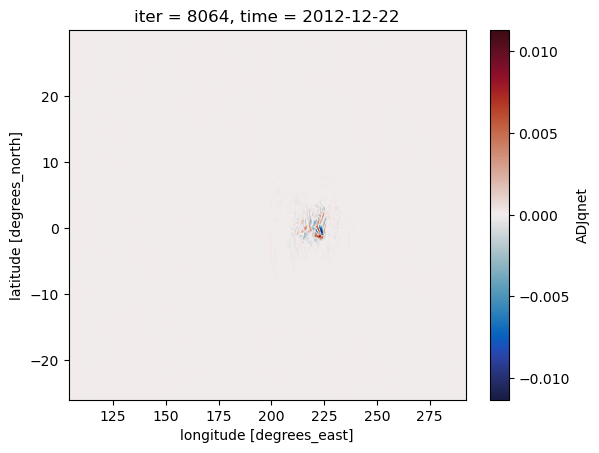

In [36]:
diff_ds.ADJqnet[-10].plot(x='XC', y='YC',cmap=cmo.balance)

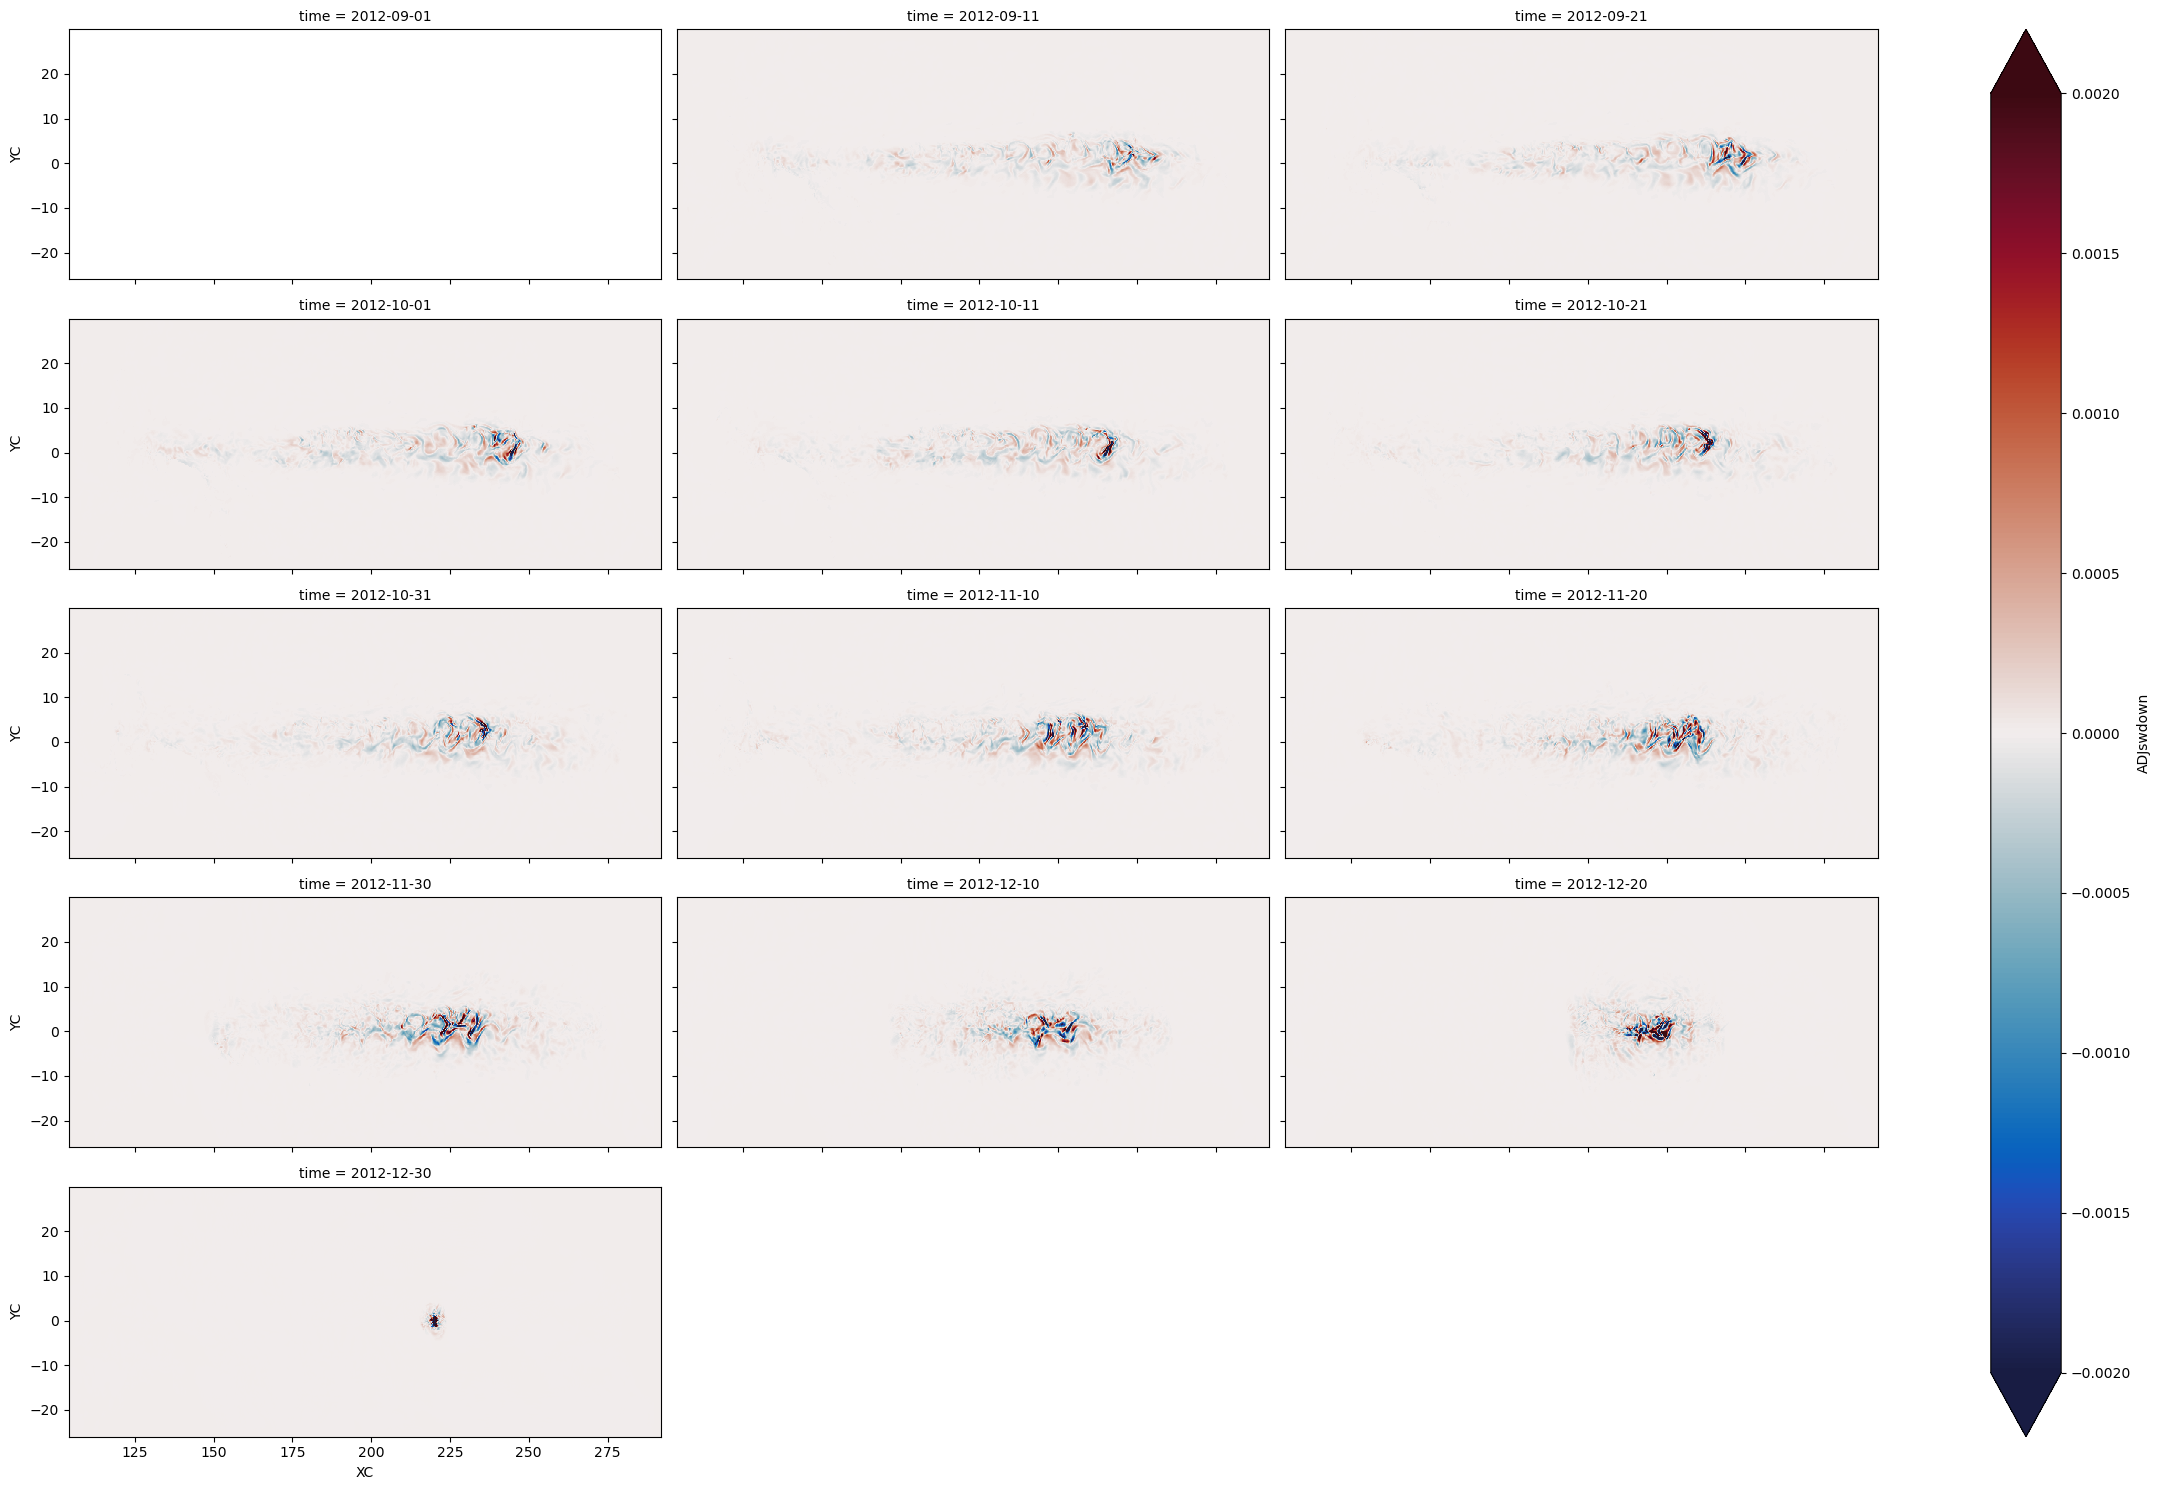

In [37]:
diff_ds.ADJswdown[::10].plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5,cmap=cmo.balance, vmin=-0.002, vmax=0.002, robust=True)

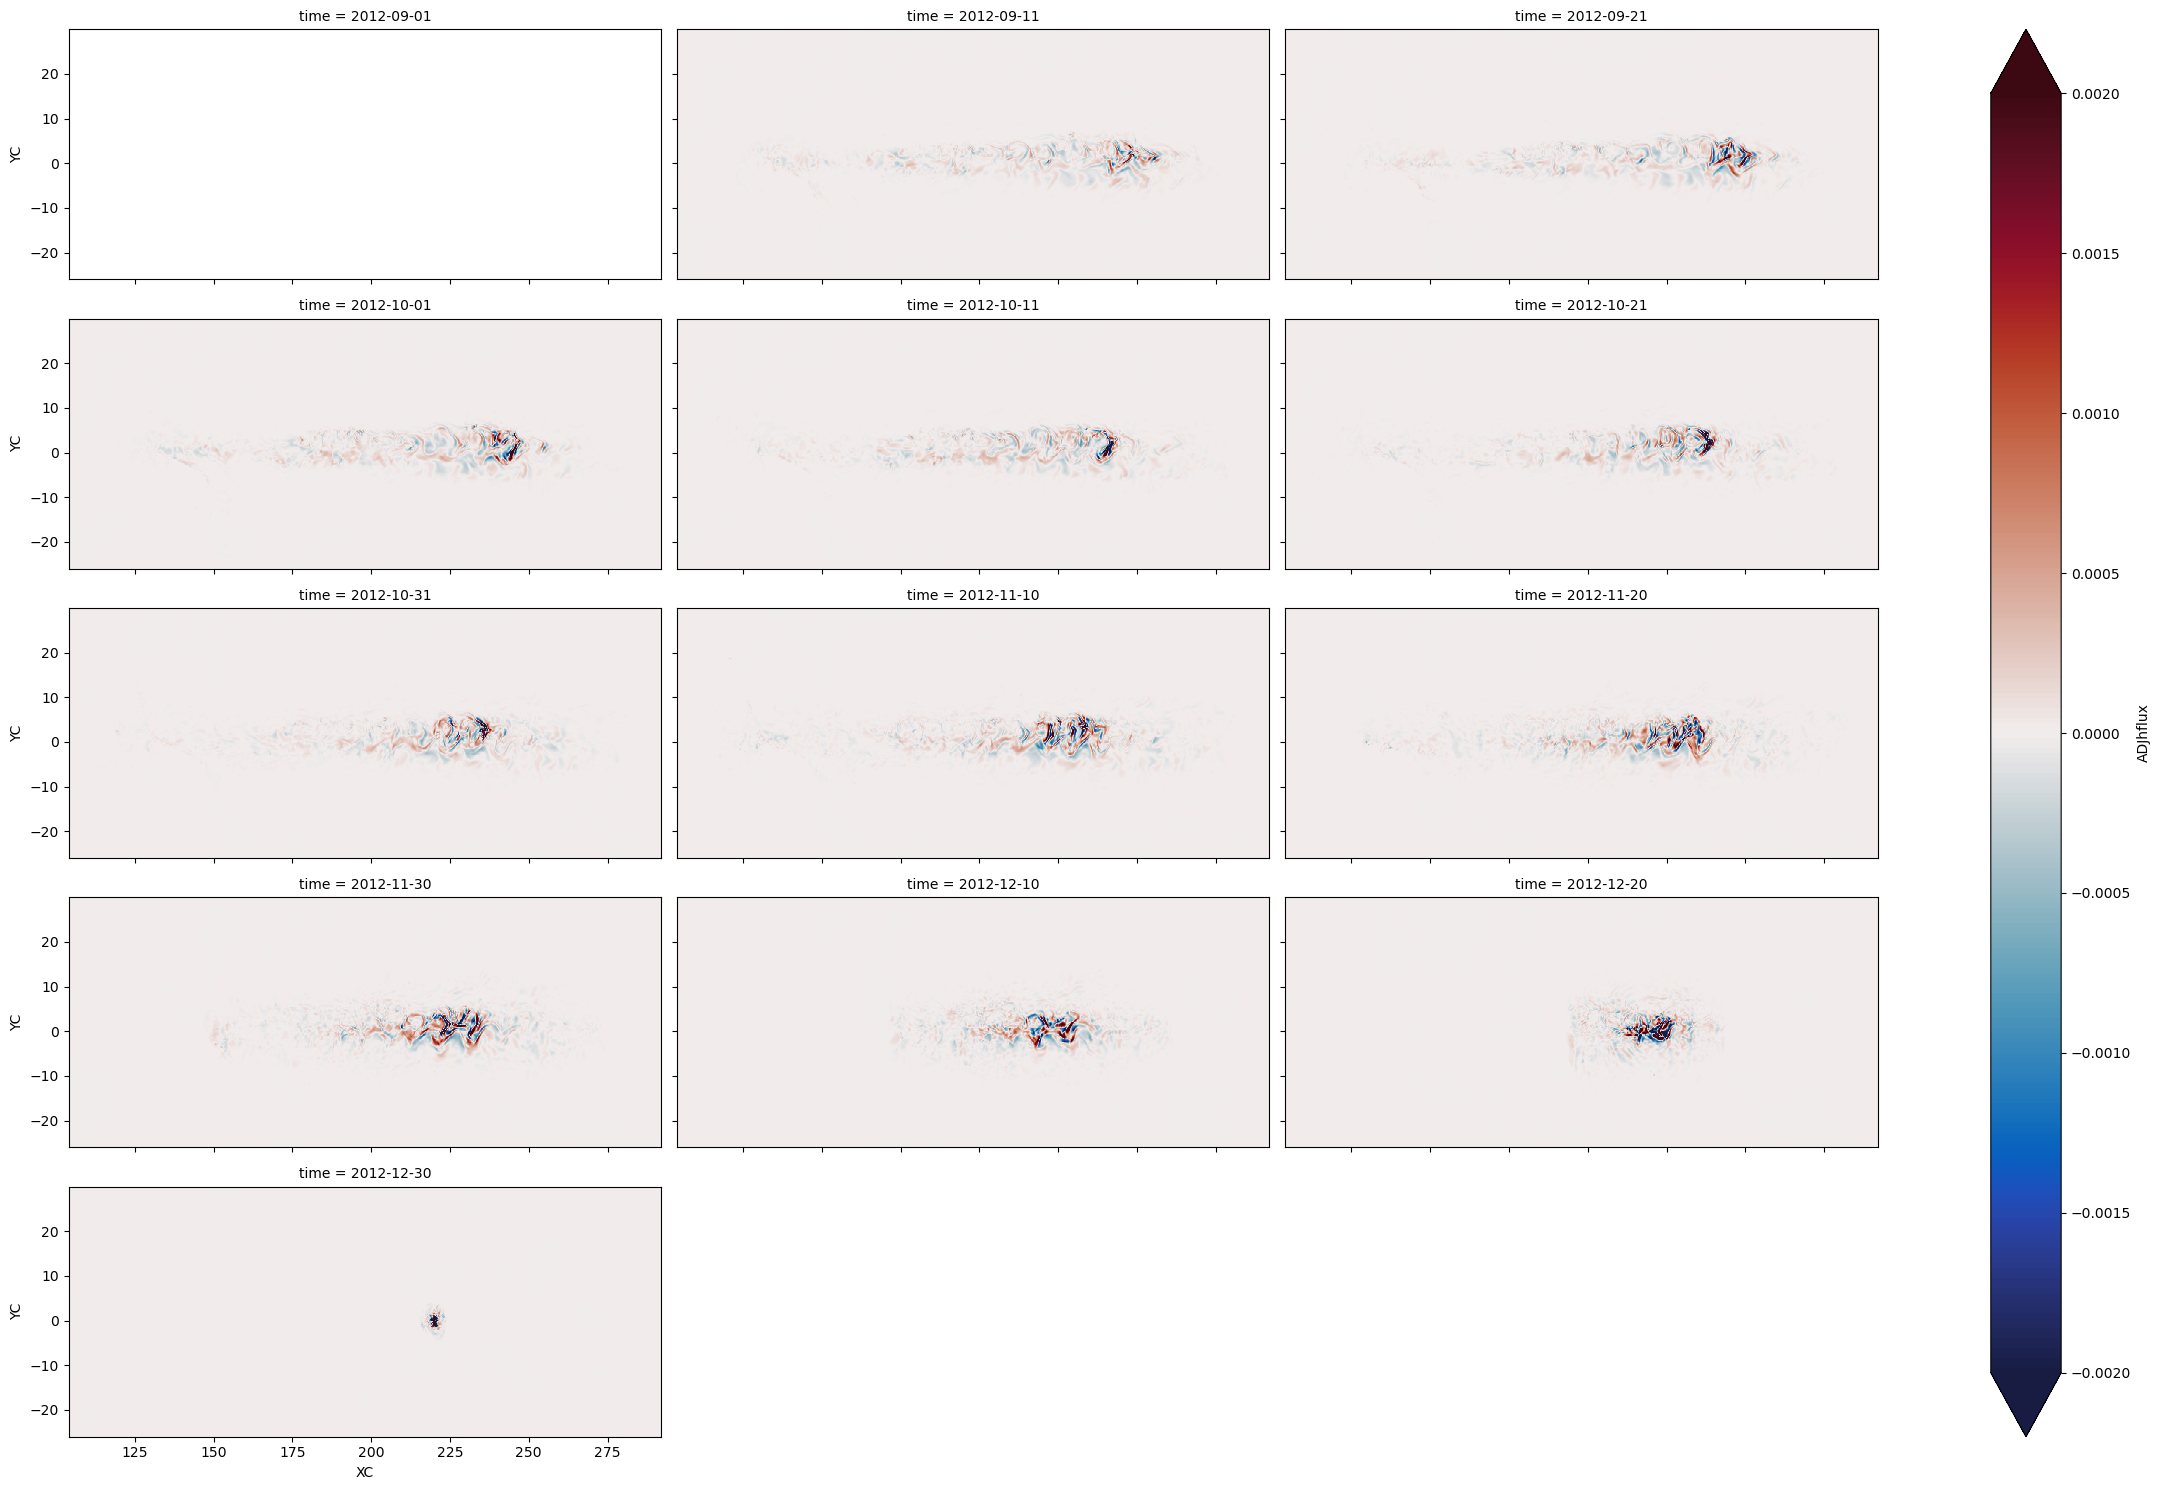

In [38]:
diff_ds.ADJhflux[::10].plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5,cmap=cmo.balance, vmin=-0.002, vmax=0.002, robust=True)

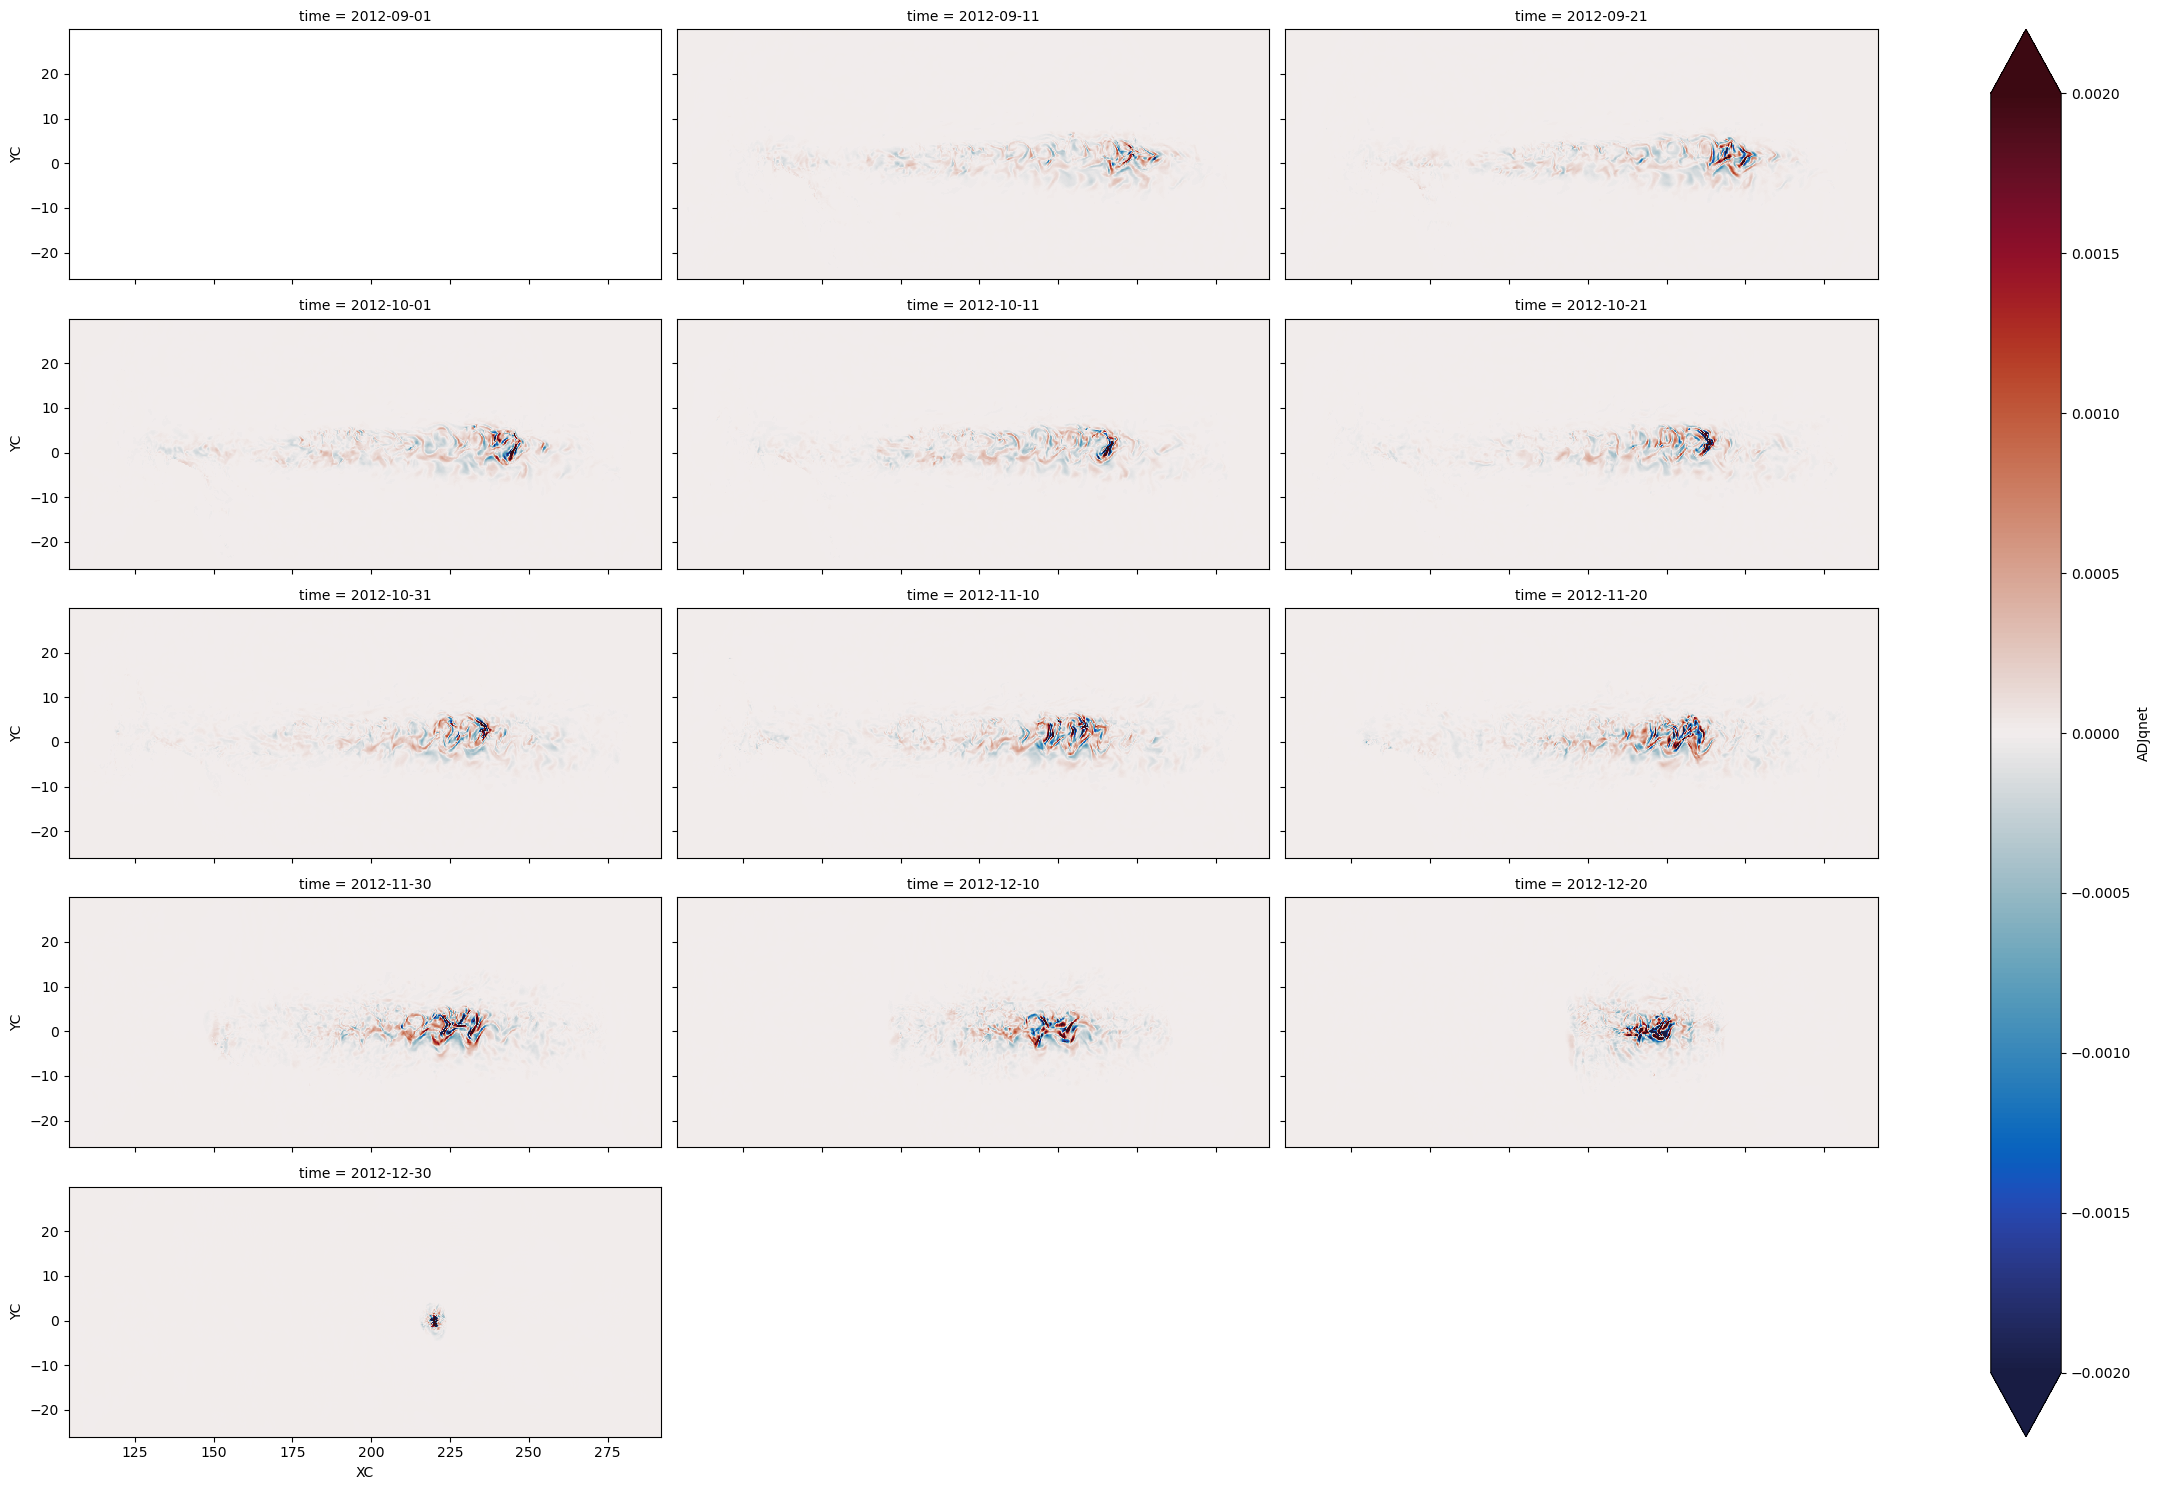

In [39]:
diff_ds.ADJqnet[::10].plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5,cmap=cmo.balance, vmin=-0.002, vmax=0.002, robust=True)

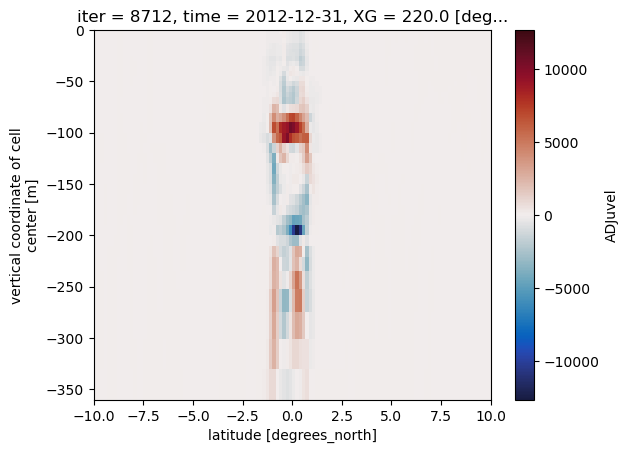

In [40]:
diff_ds.ADJuvel[-1,:40].sel(XG=[220.0],method='nearest').sel(YC=slice(-10,10)).plot(x='YC', y='Z', cmap=cmo.balance)

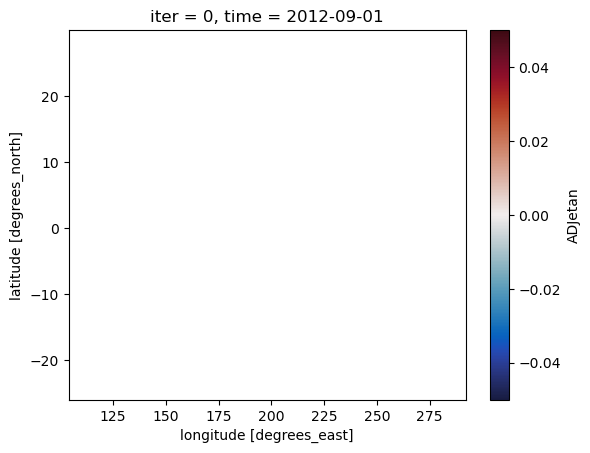

In [ ]:
diff_ds.ADJetan[1].plot(x='XC', y='YC',cmap=cmo.balance)

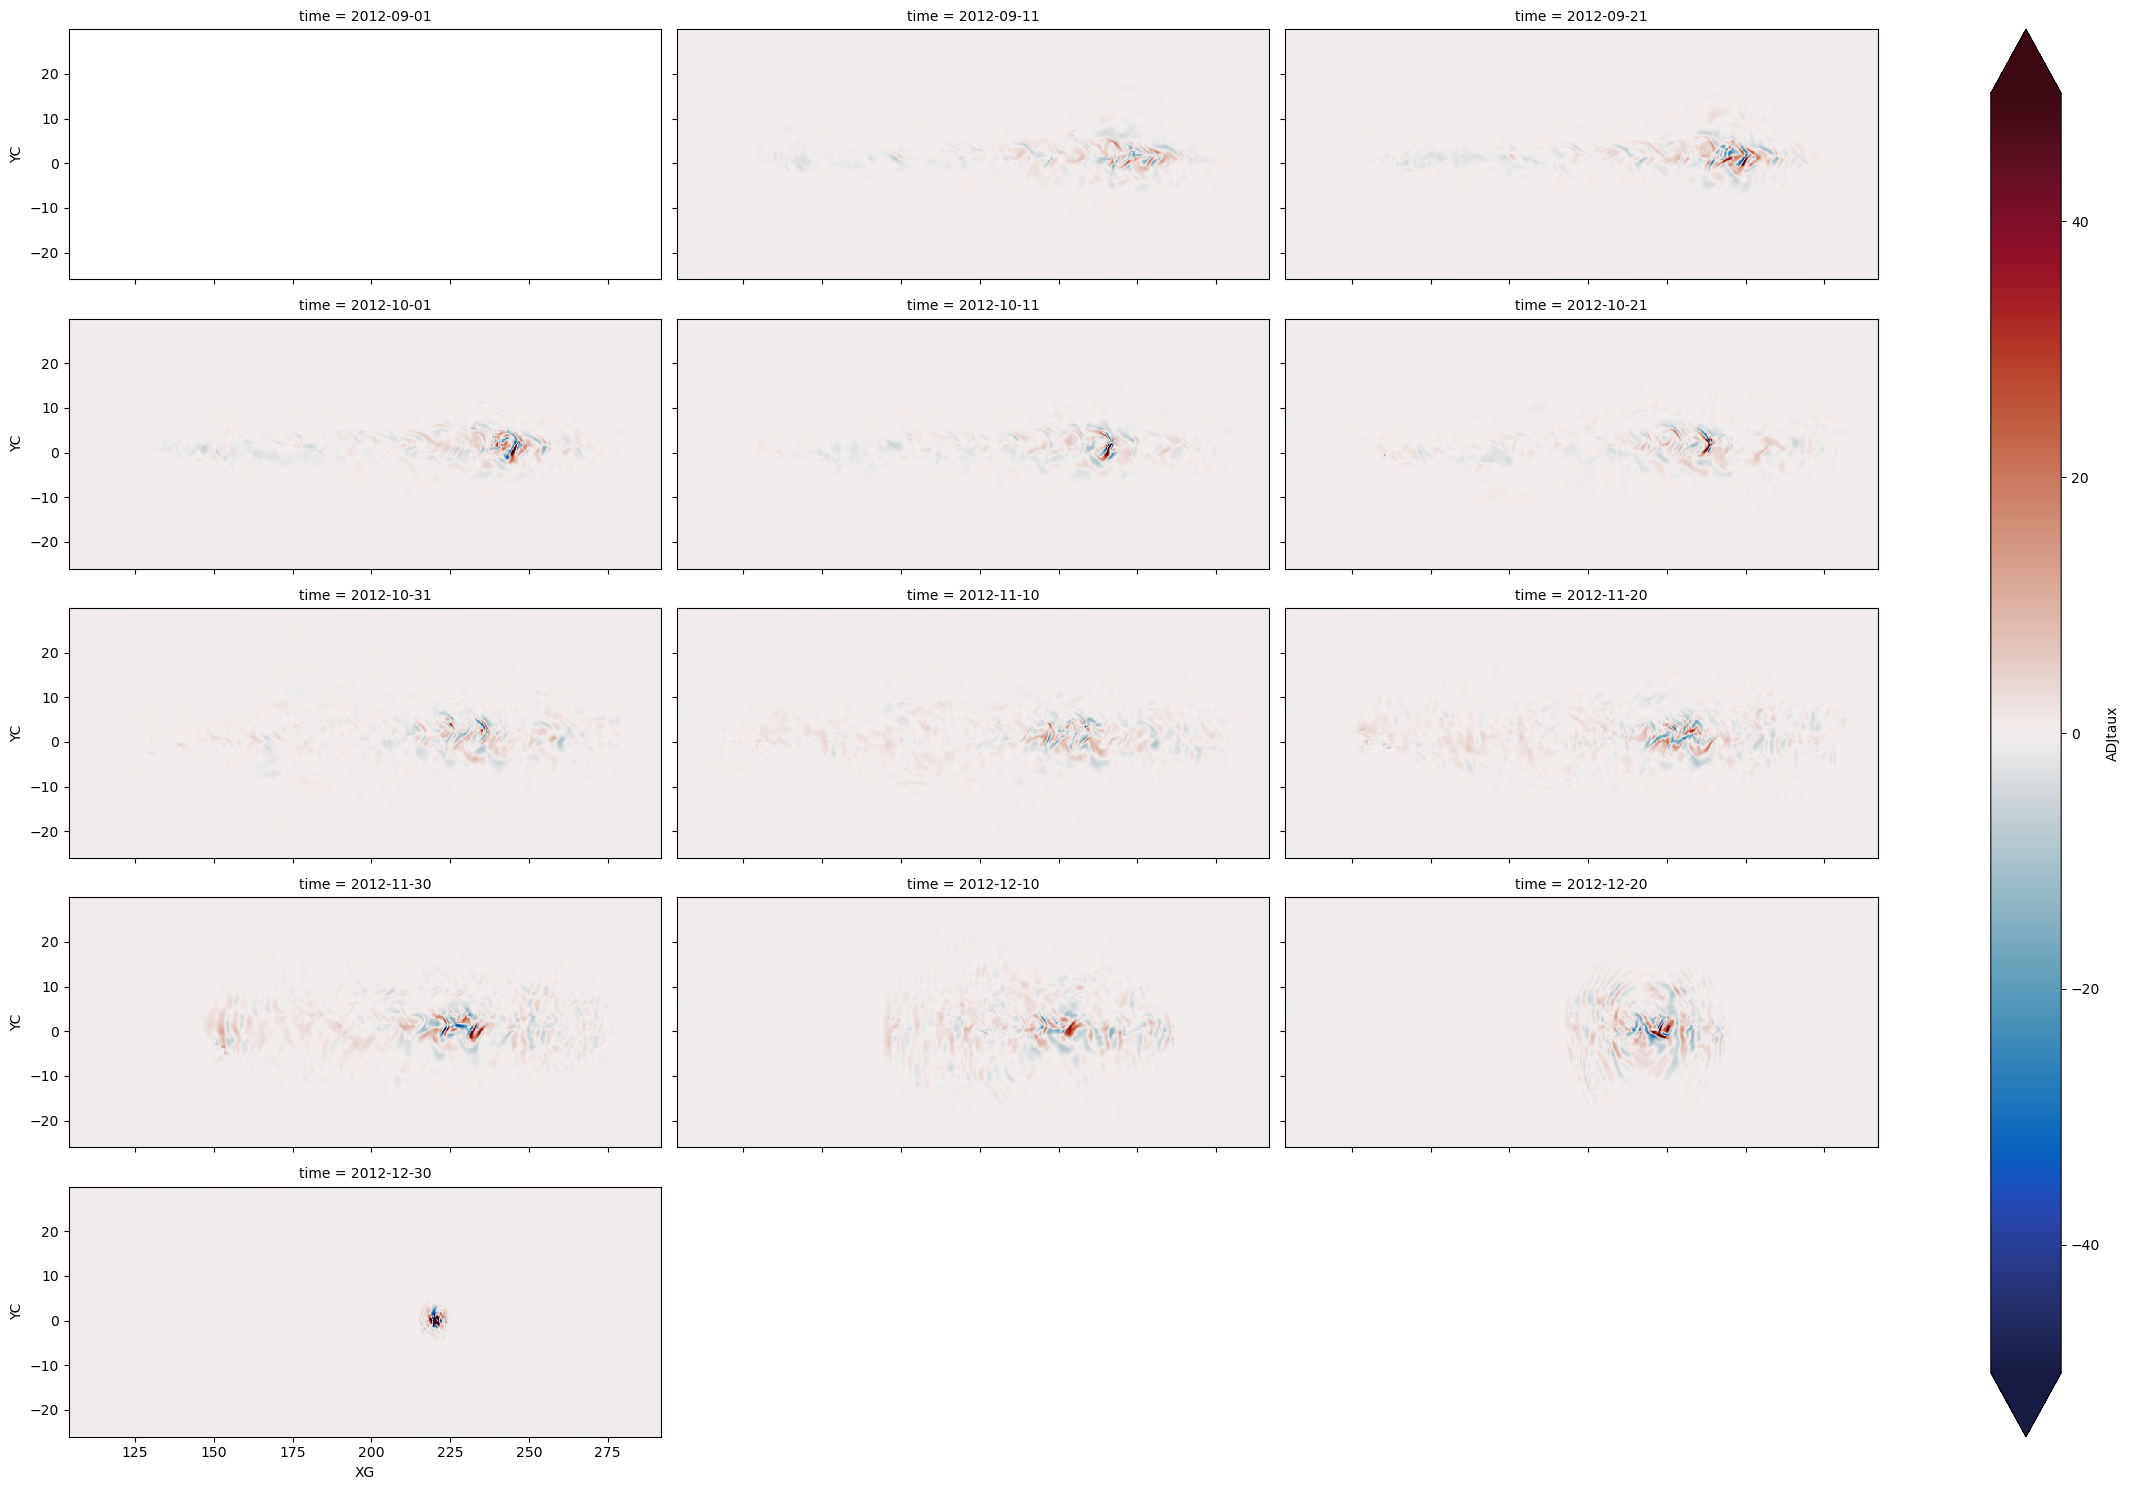

In [42]:
diff_ds.ADJtaux[::10].plot(x='XG', y='YC', col='time', col_wrap=3, aspect=2.5, vmin=-50, vmax=50,cmap=cmo.balance)

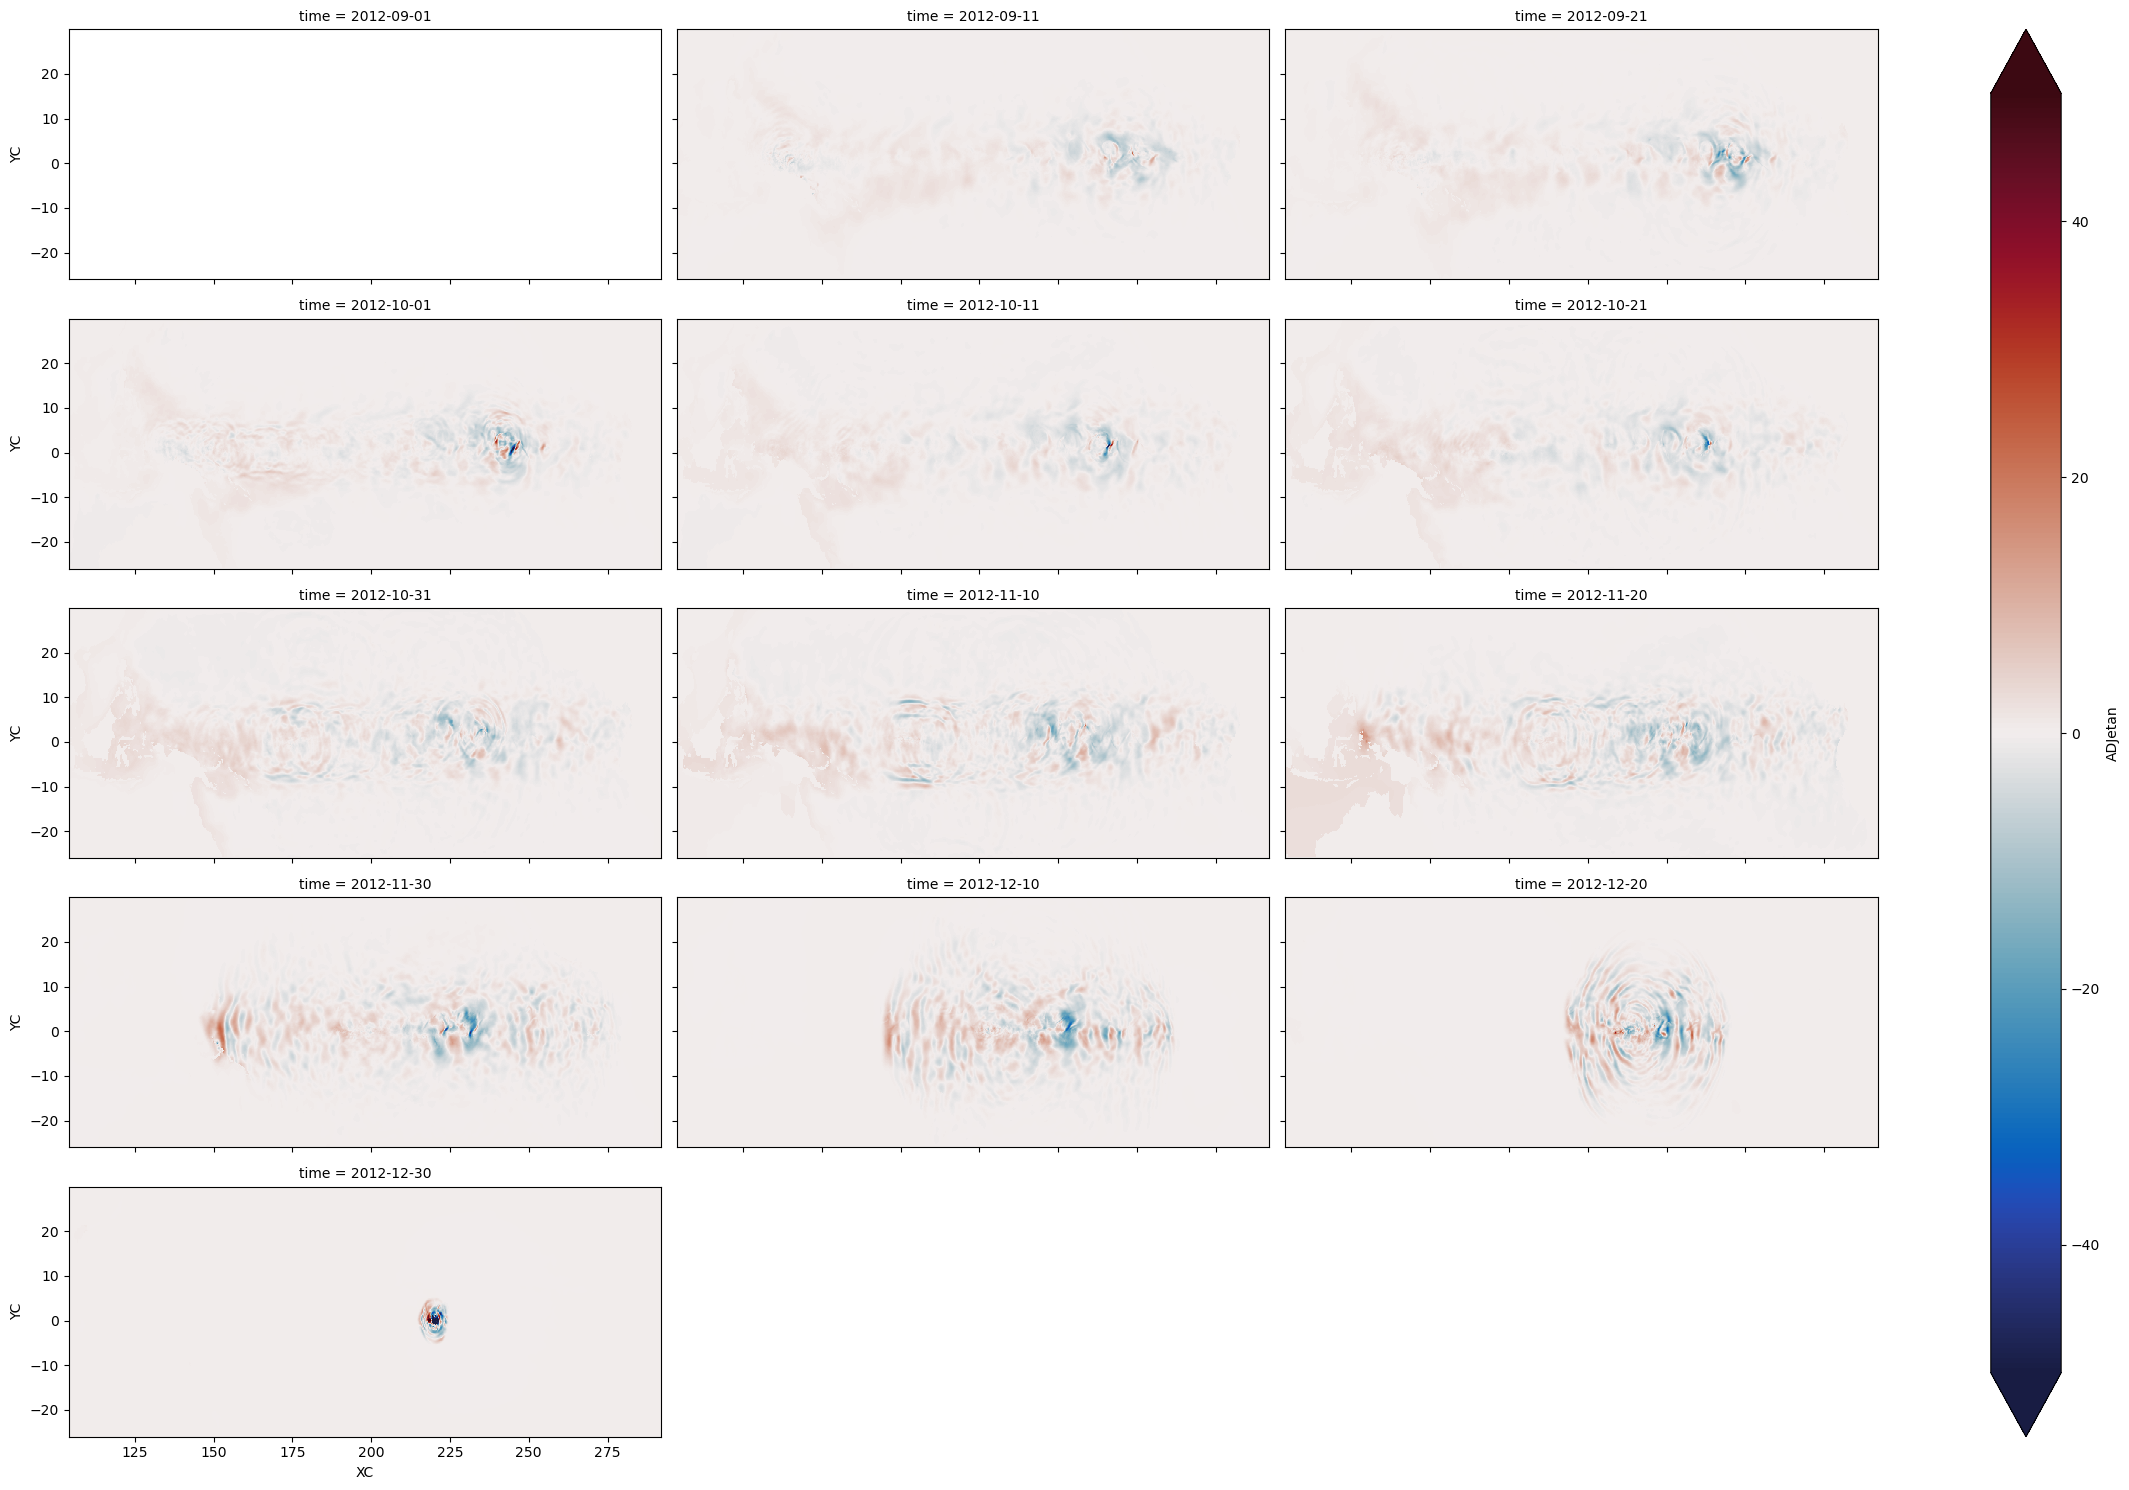

In [43]:
diff_ds.ADJetan[::10].plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5, vmin=-50, vmax=50,cmap=cmo.balance)

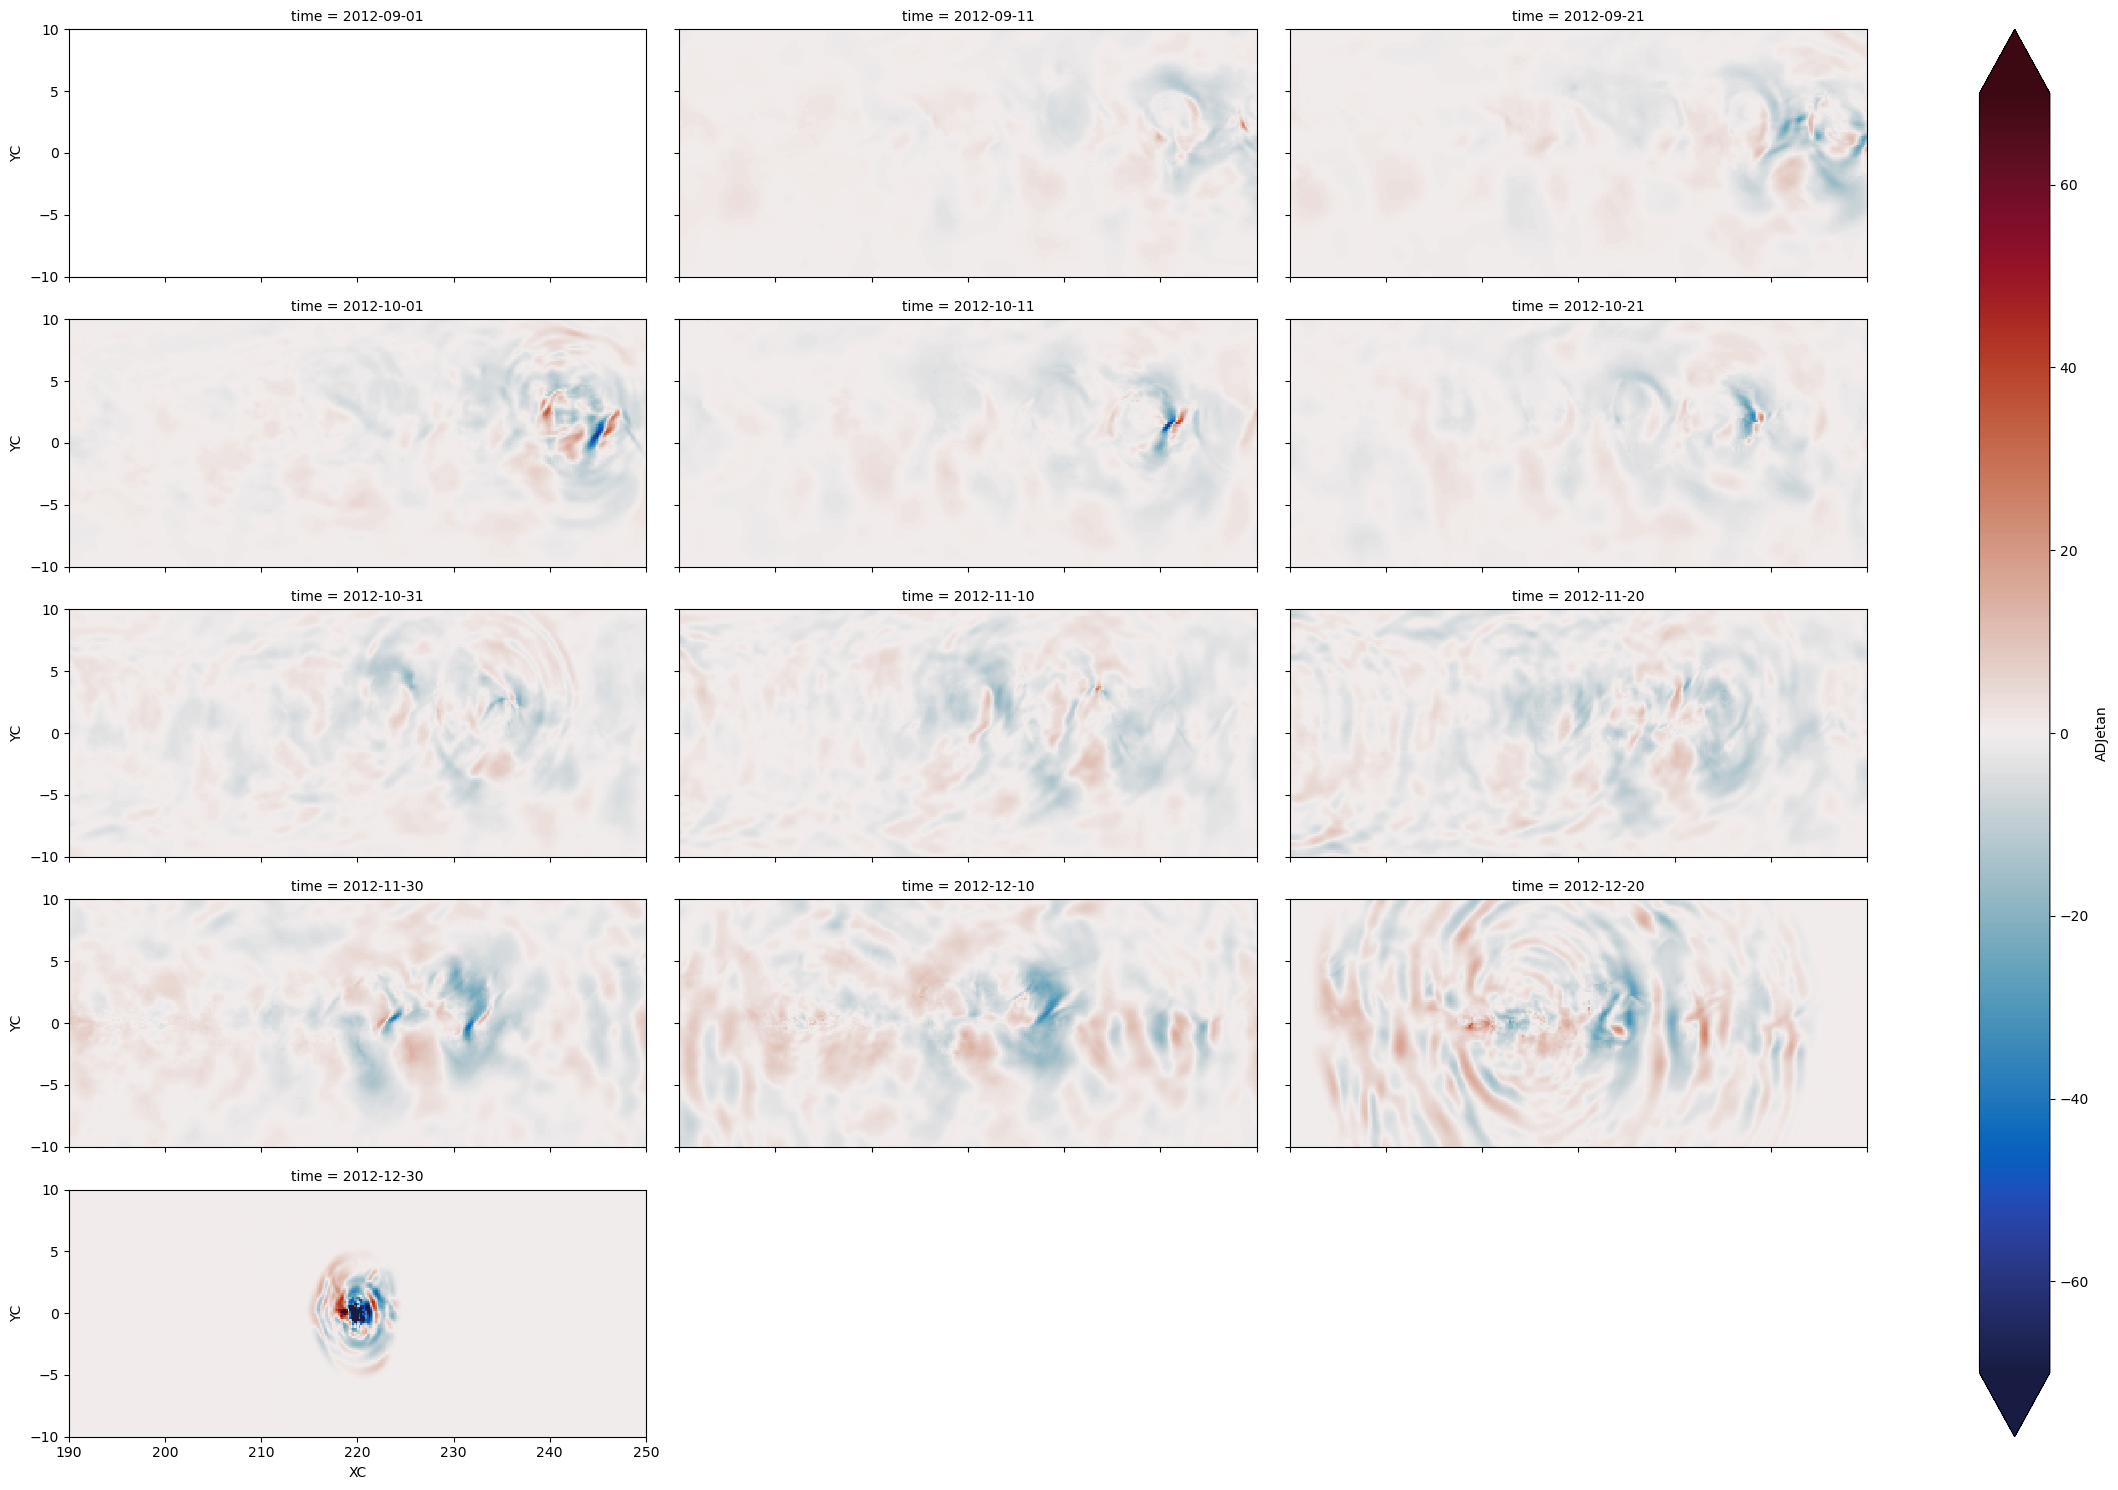

In [44]:
diff_ds.ADJetan.sel(XC=slice(190,250),YC=slice(-10,10))[::10].plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5, vmin=-70, vmax=70,cmap=cmo.balance)

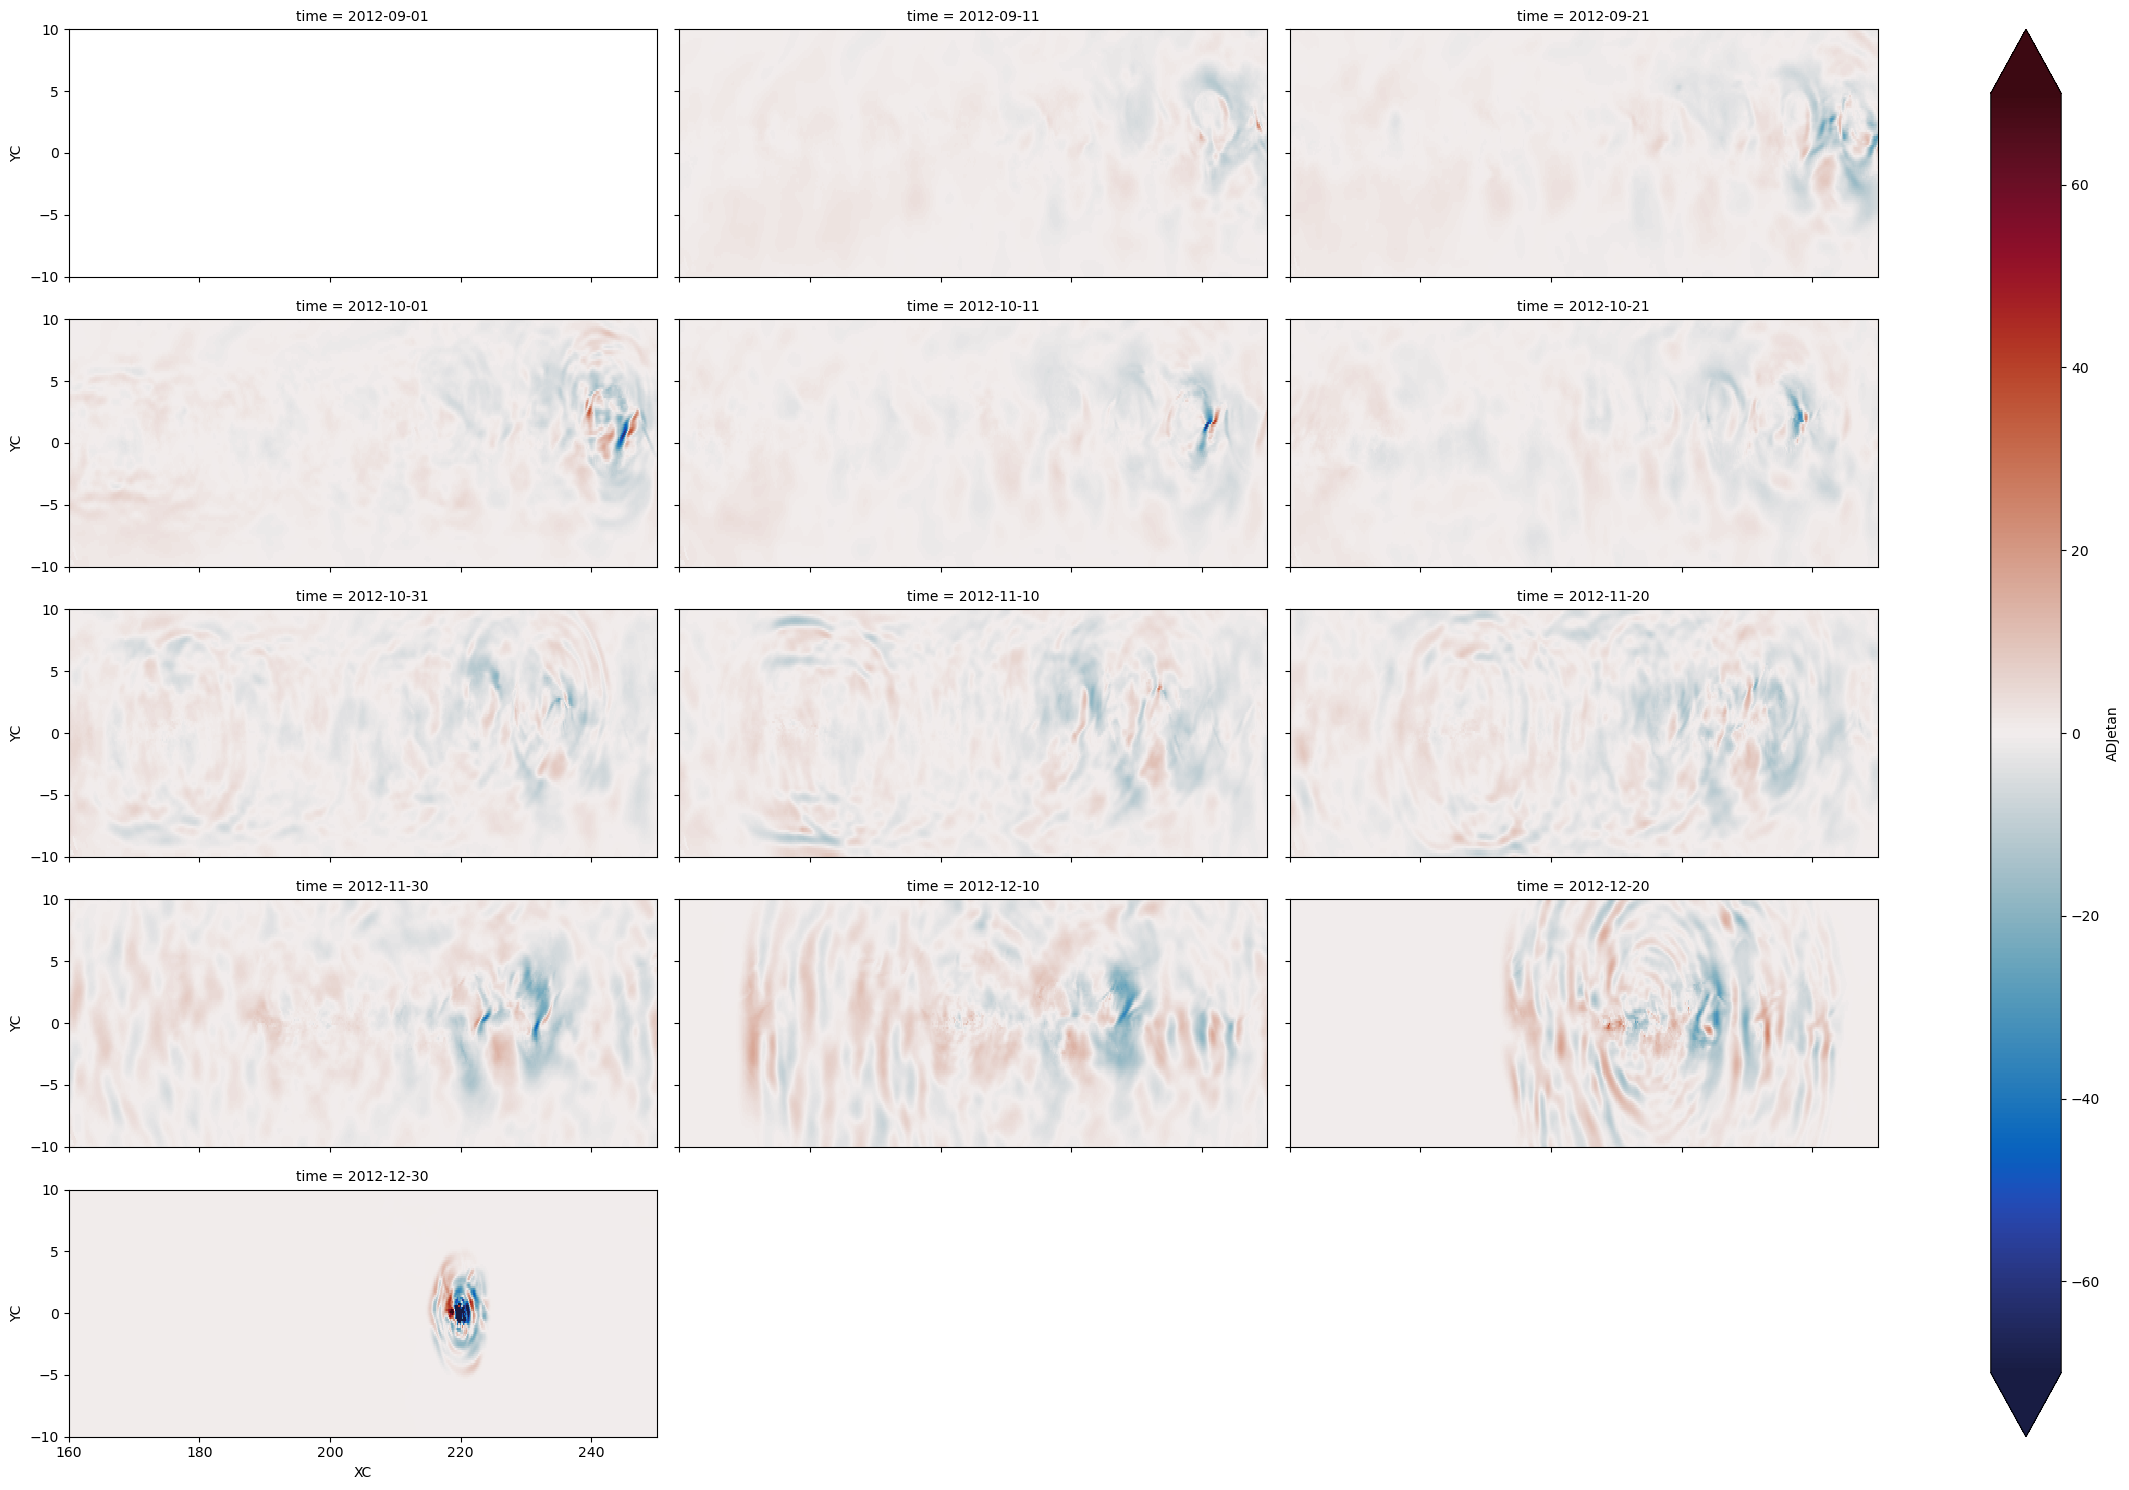

In [45]:
diff_ds.ADJetan.sel(XC=slice(160,250),YC=slice(-10,10))[::10].plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5, vmin=-70, vmax=70,cmap=cmo.balance)

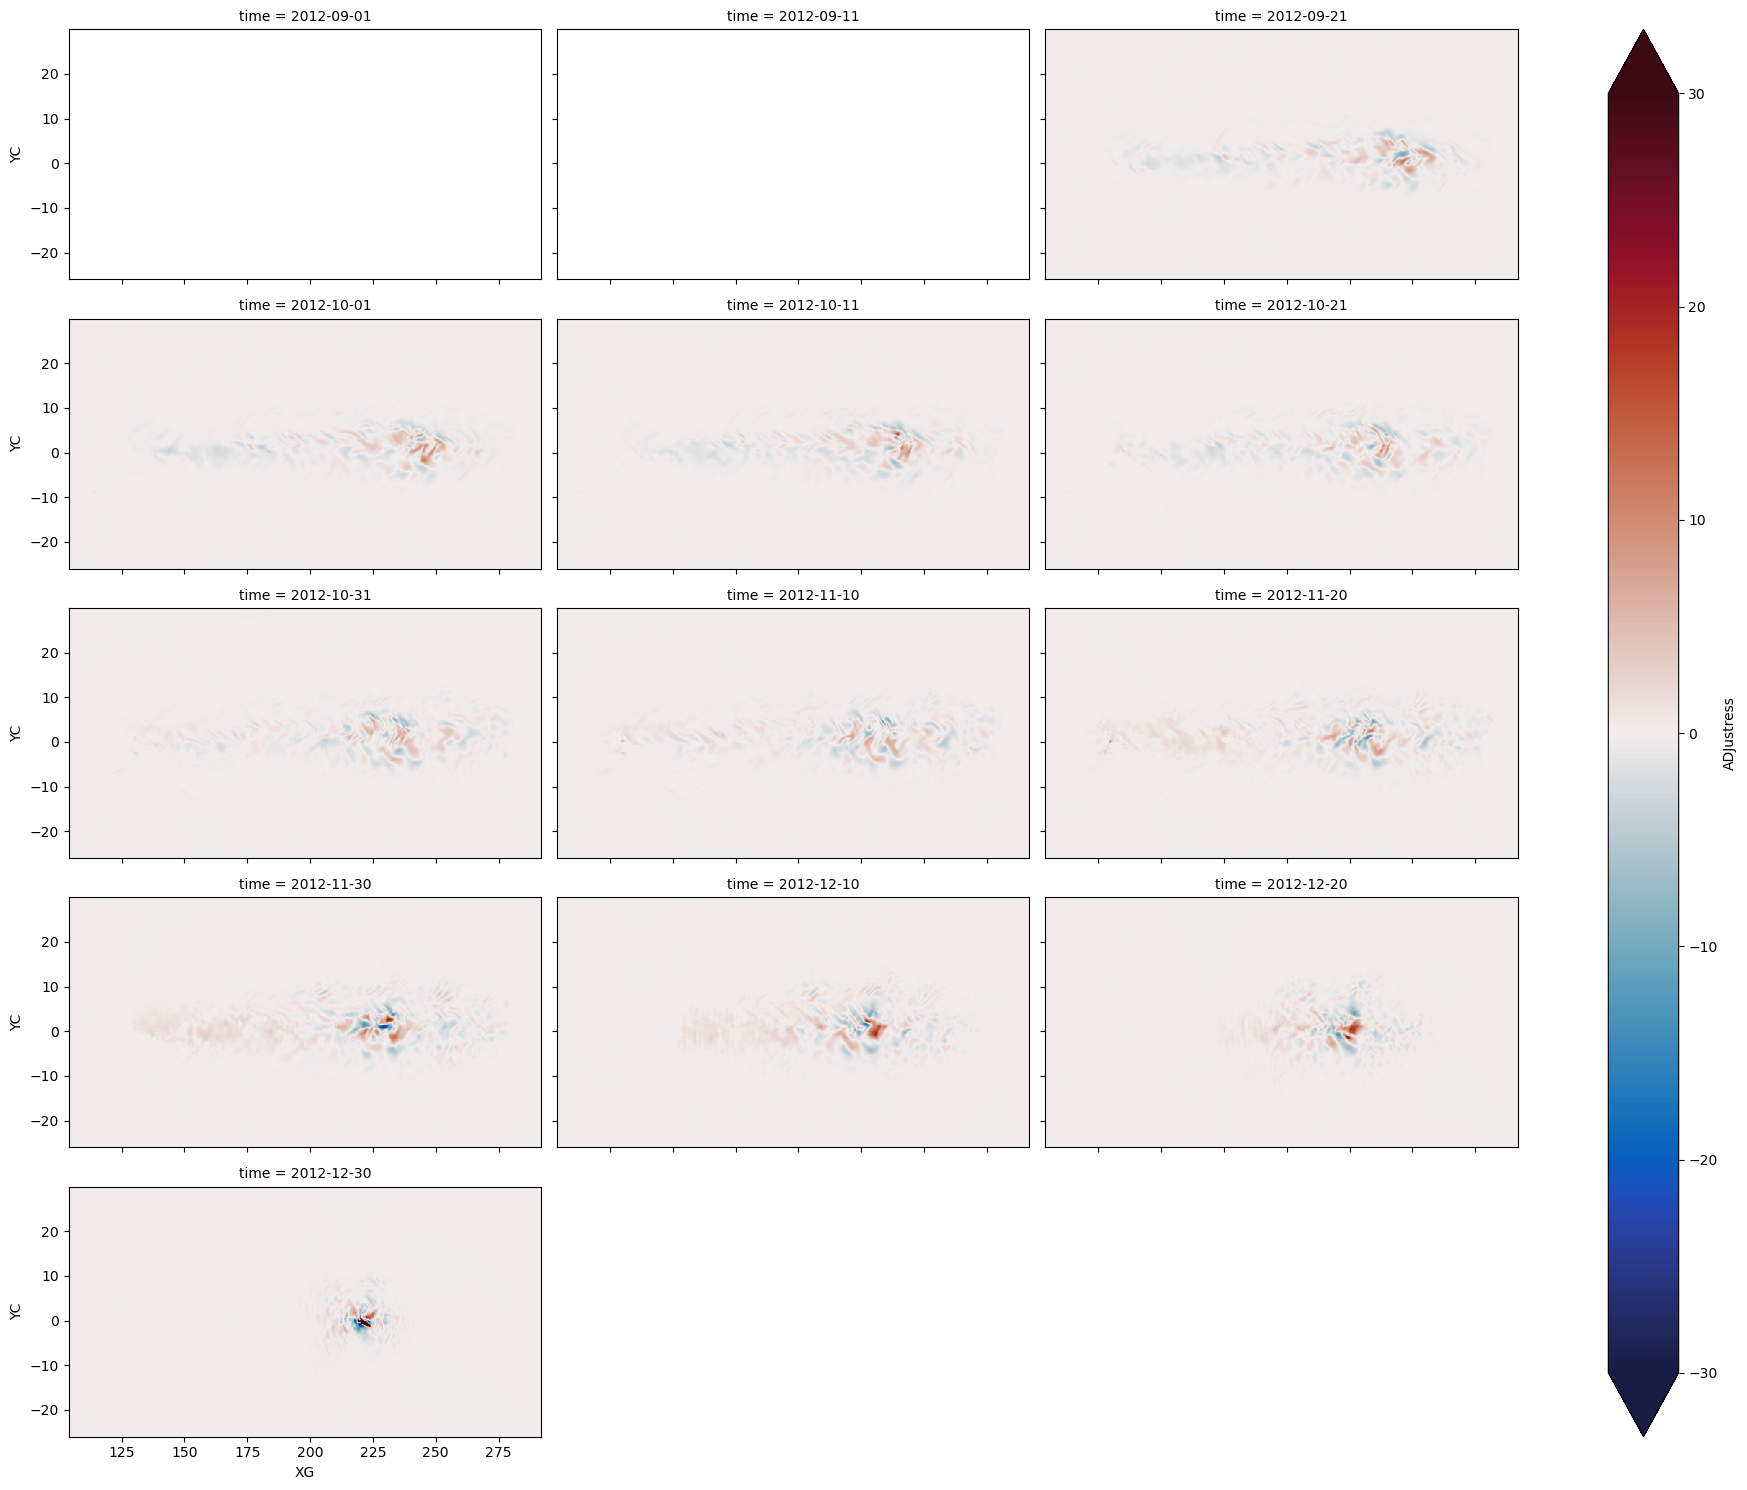

In [46]:
(diff_ds.ADJustress.rolling(time=10).mean())[::10].plot(x='XG', y='YC', col='time', col_wrap=3, aspect=2,cmap=cmo.balance, vmin=-30,vmax=30)

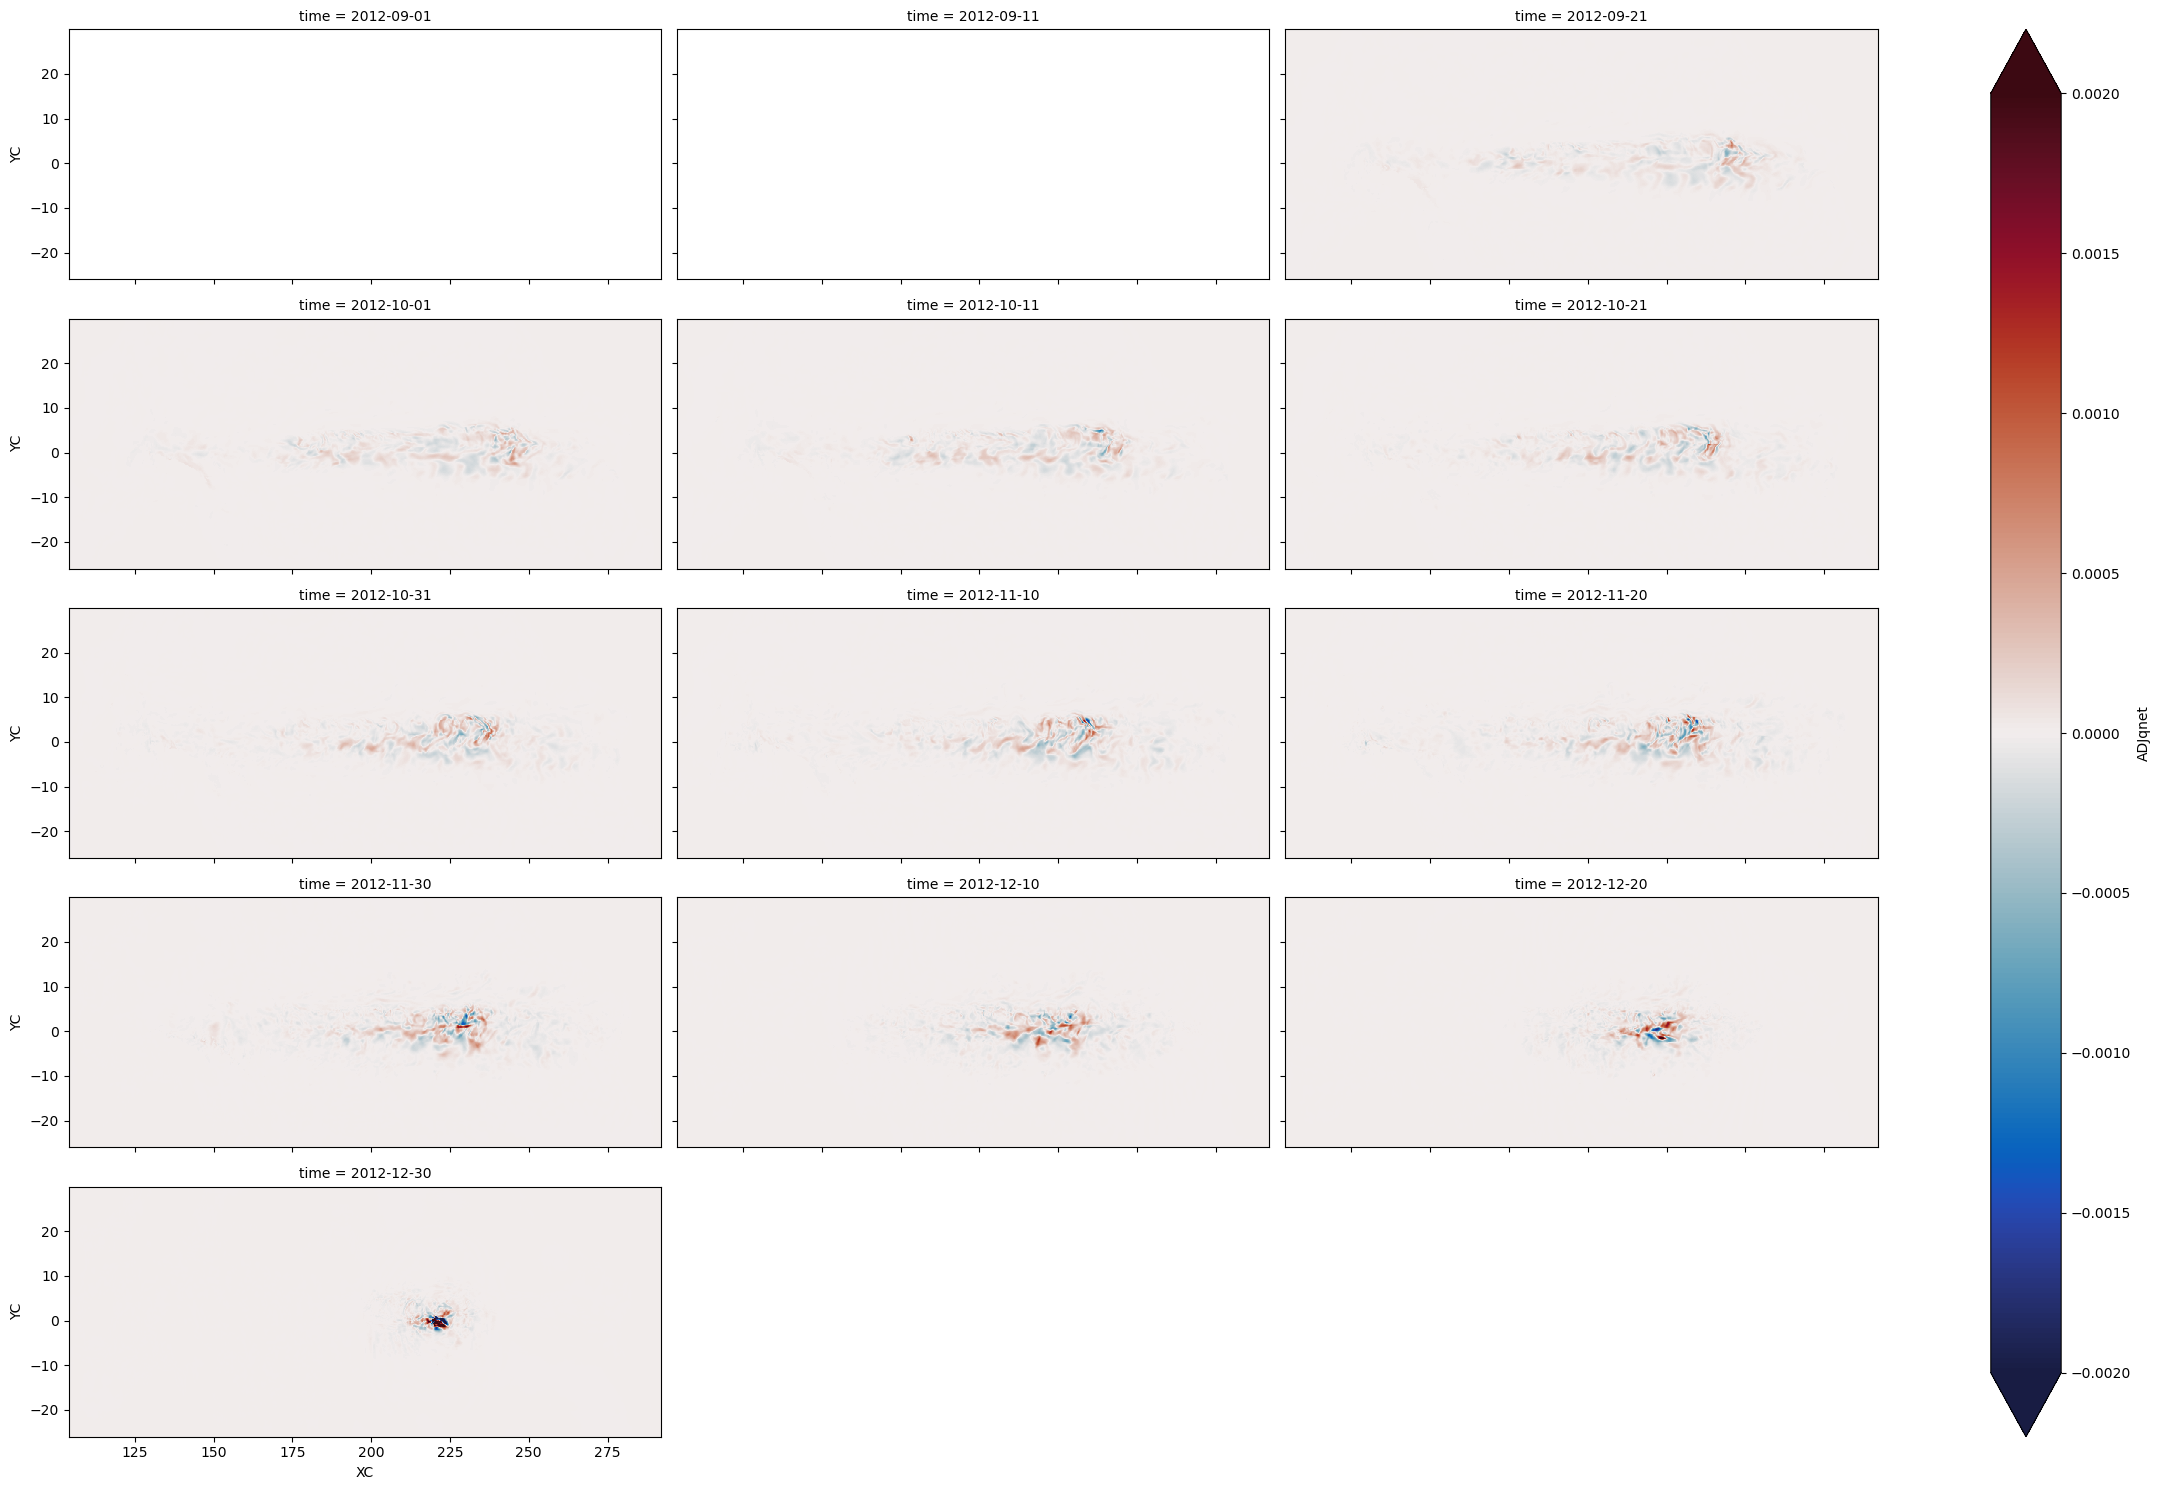

In [47]:
(diff_ds.ADJqnet.rolling(time=10).mean())[::10].plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5,cmap=cmo.balance, vmin=-0.002, vmax=0.002, robust=True)

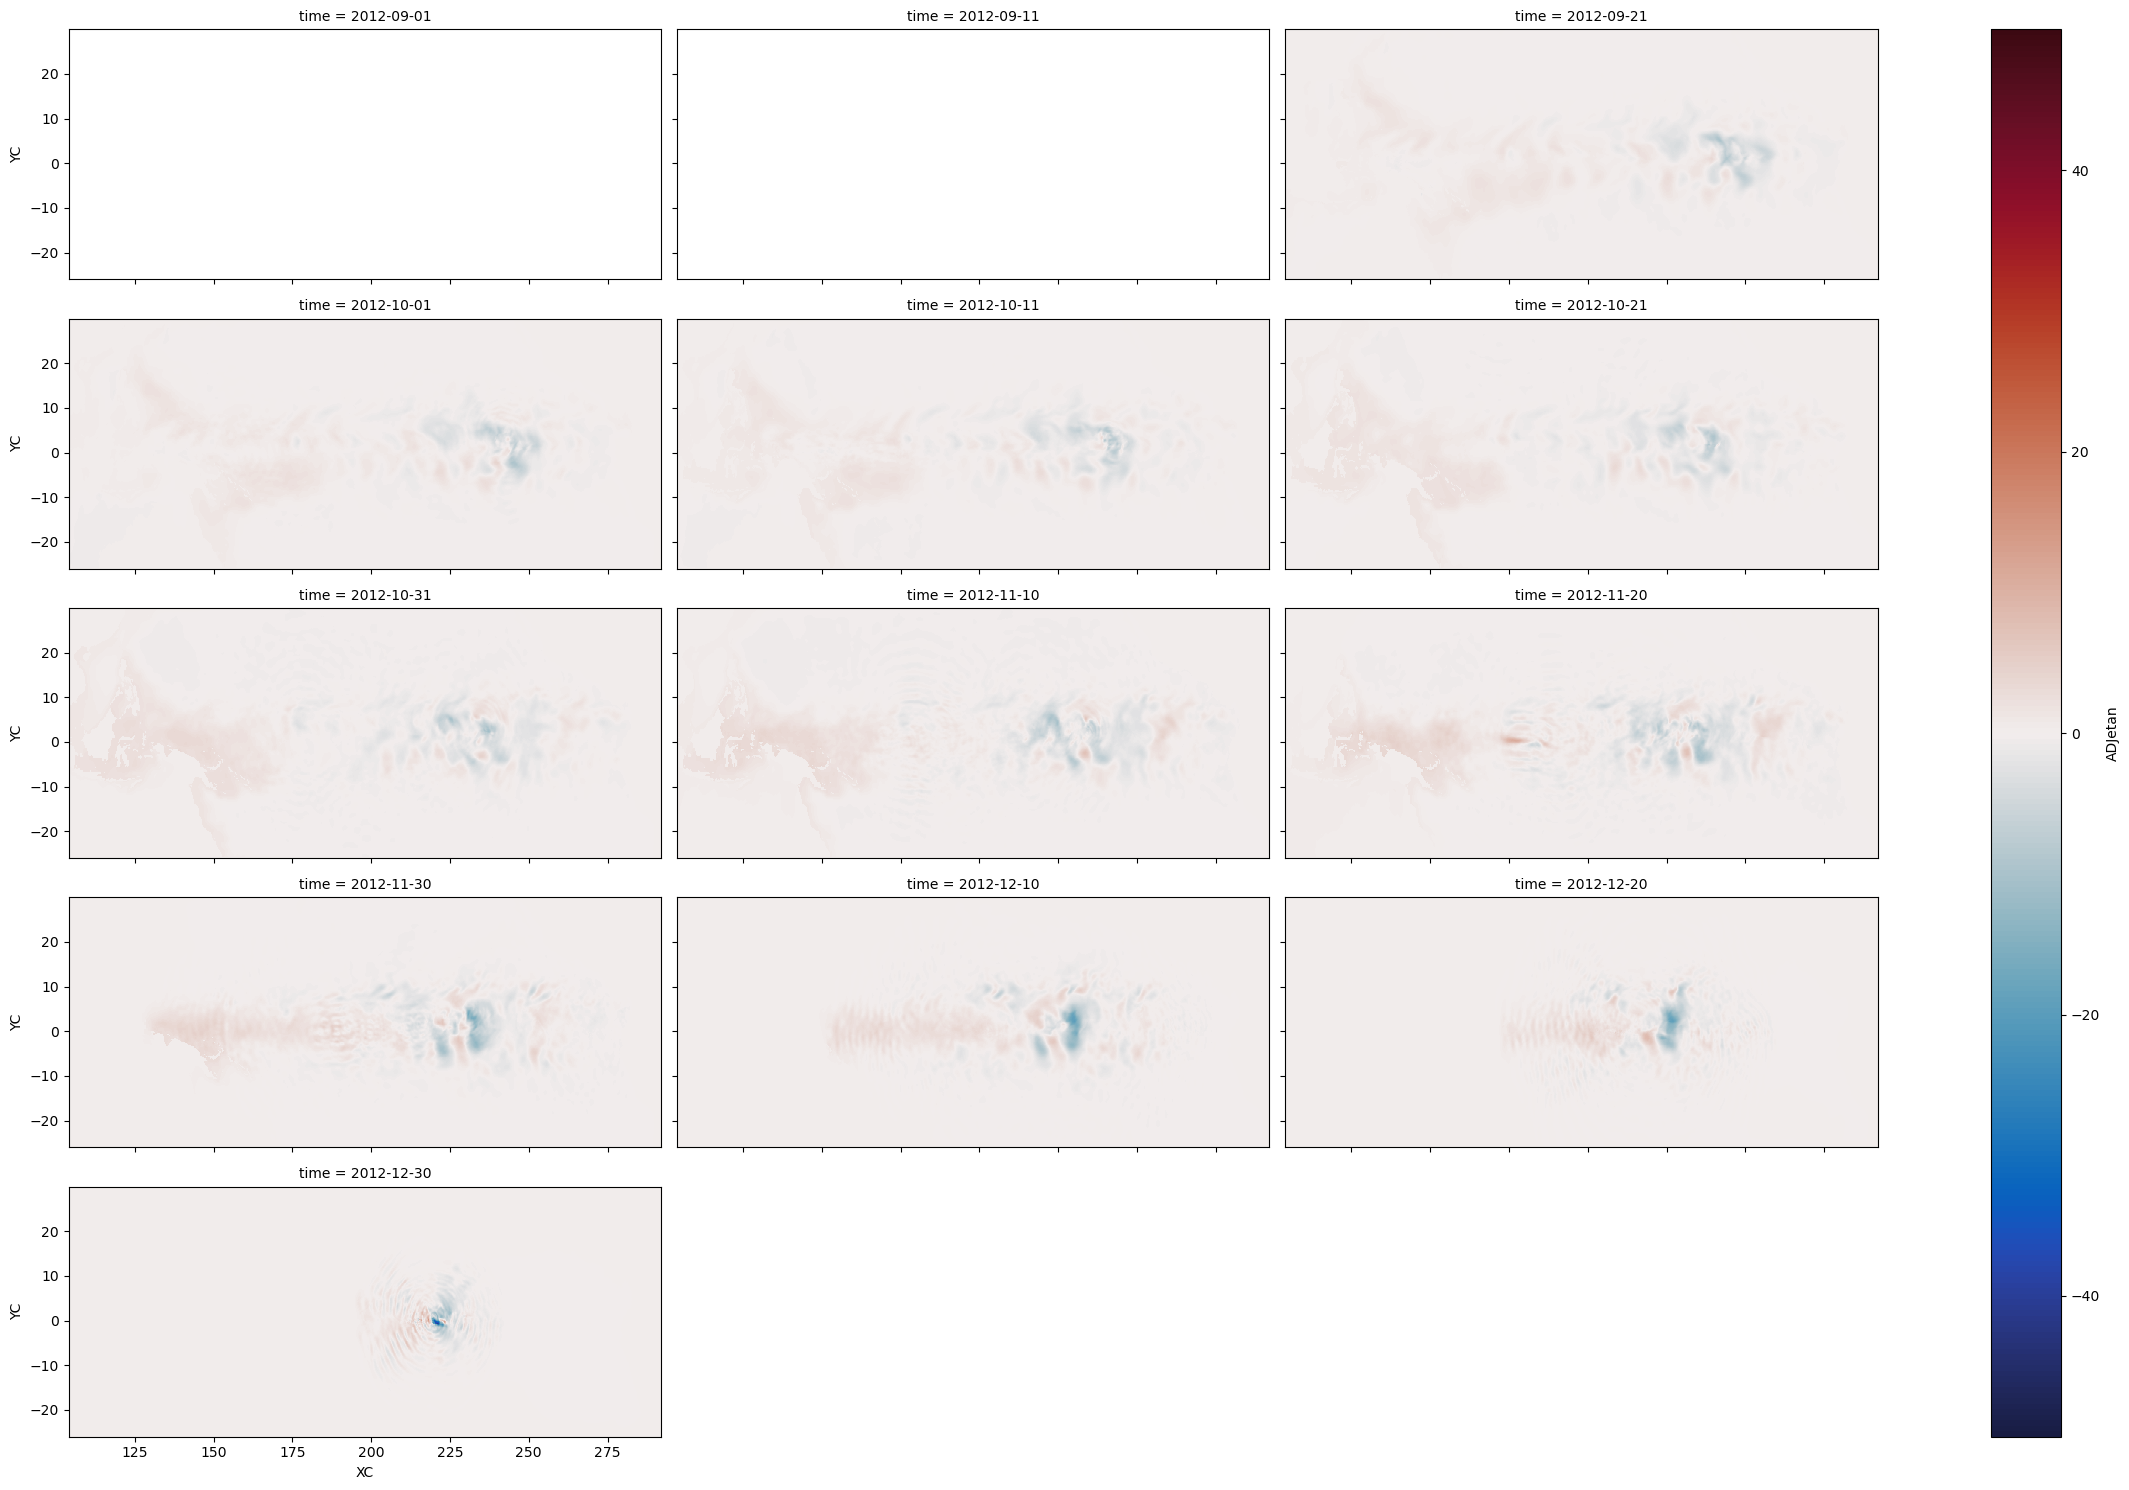

In [48]:
(diff_ds.ADJetan.rolling(time=10).mean())[::10].plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5, vmin=-50,vmax=50, cmap=cmo.balance)

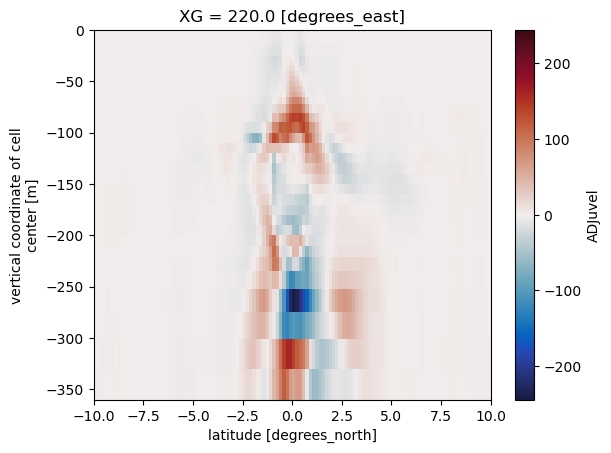

In [49]:
diff_ds.ADJuvel[1:,:40].mean(dim='time').sel(XG=[220.0],method='nearest').sel(YC=slice(-10,10)).plot(x='YC', y='Z', cmap=cmo.balance)

In [50]:
diff_ds.ADJvvel[1:,:40].mean(dim='time').sel(XC=[220.0],method='nearest').sel(YG=slice(-10,10)).plot(x='YG', y='Z', cmap=cmo.balance)

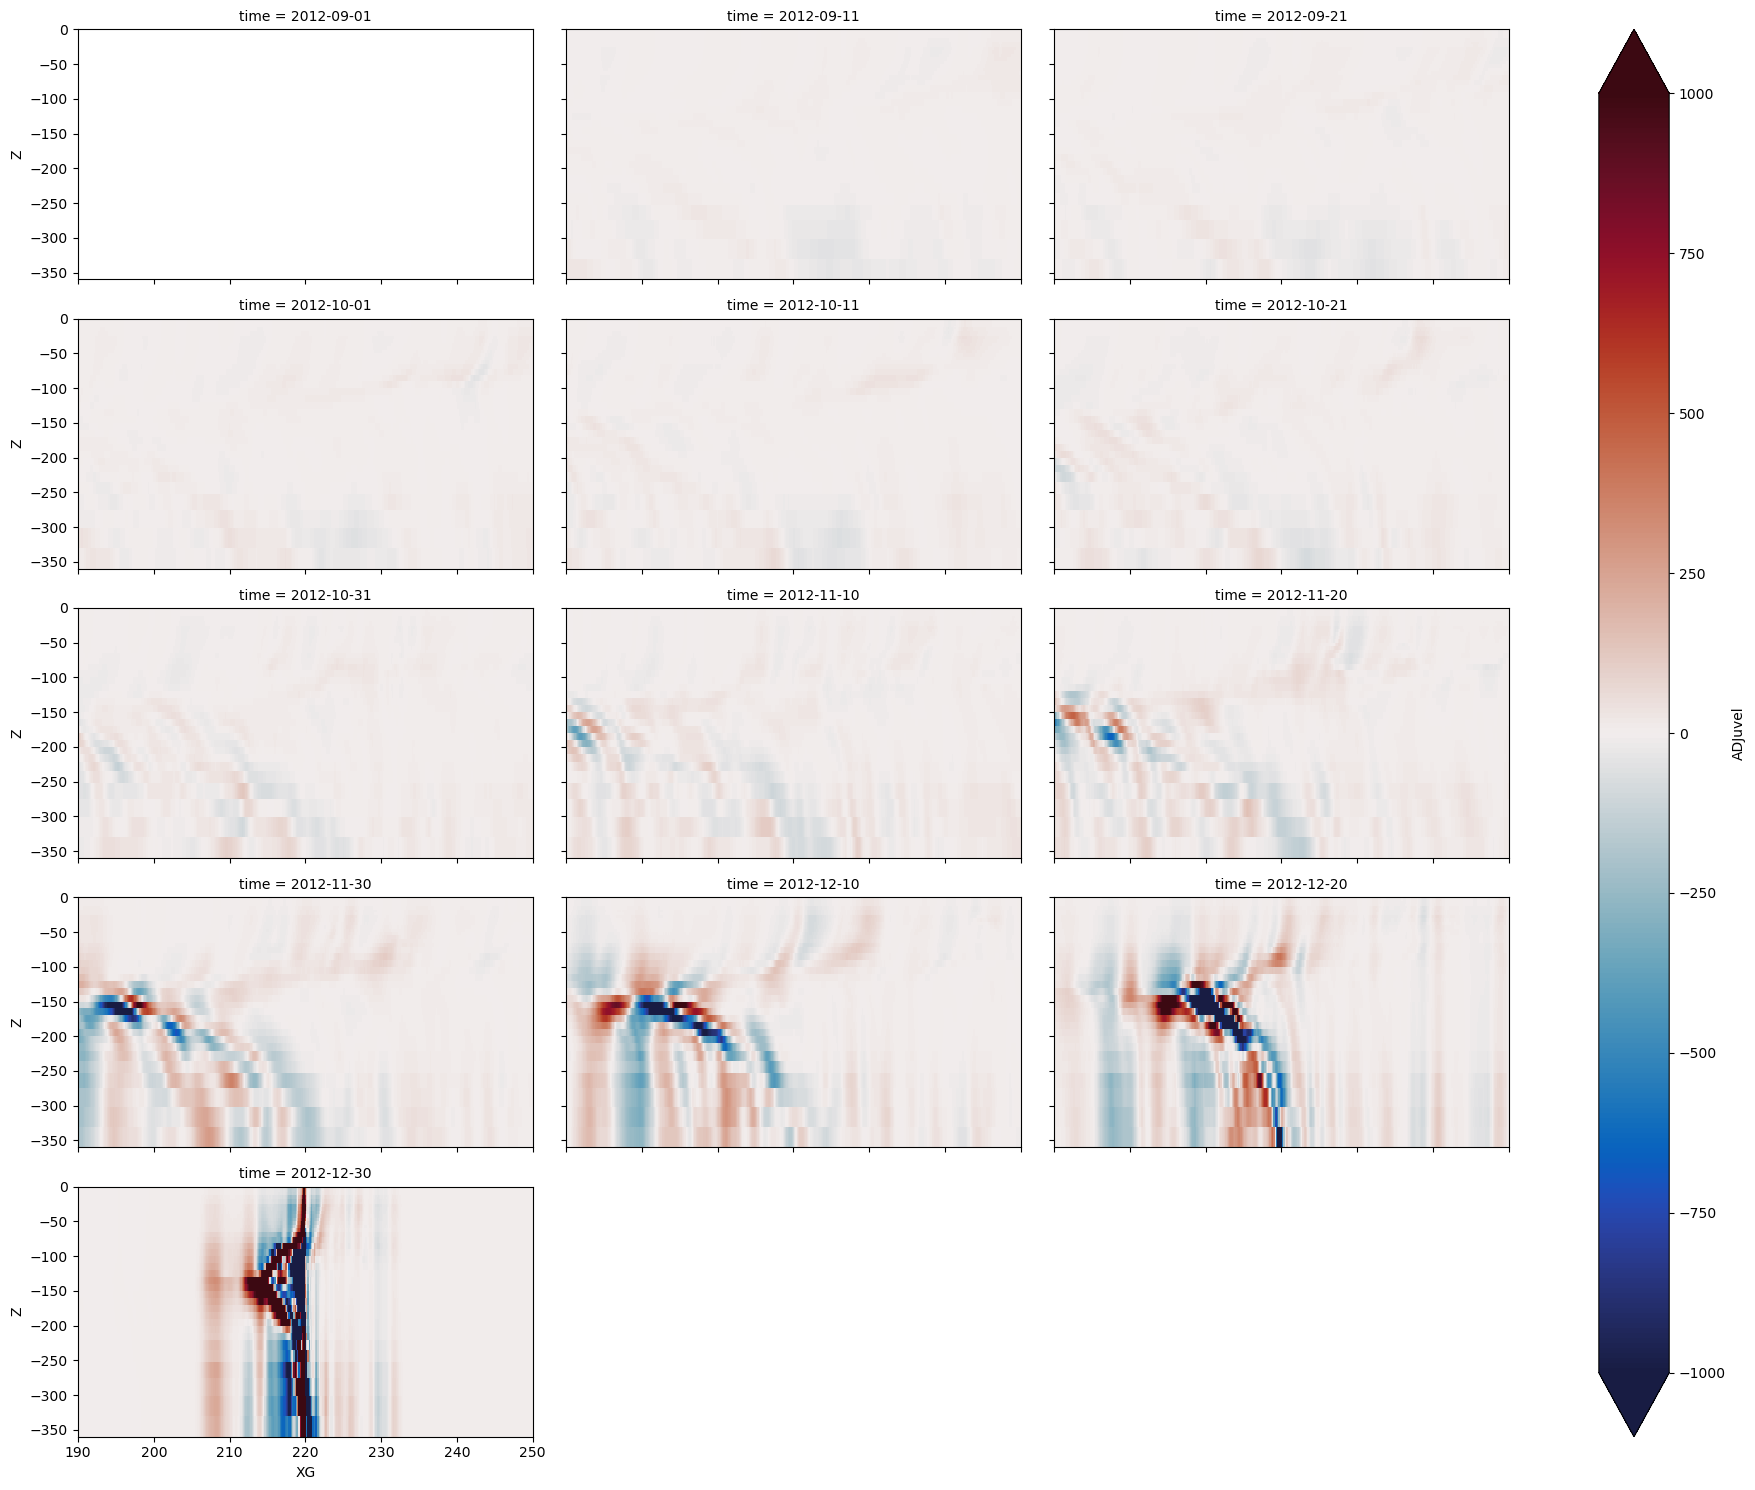

In [ ]:
(diff_ds.ADJuvel.rolling(time=5).mean())[::10,:40].sel(YC=[0.0],method='nearest').sel(XG=slice(190,250)).plot(x='XG', y='Z', col='time', col_wrap=3, aspect=2, vmin=-1000, vmax=1000,cmap=cmo.balance)

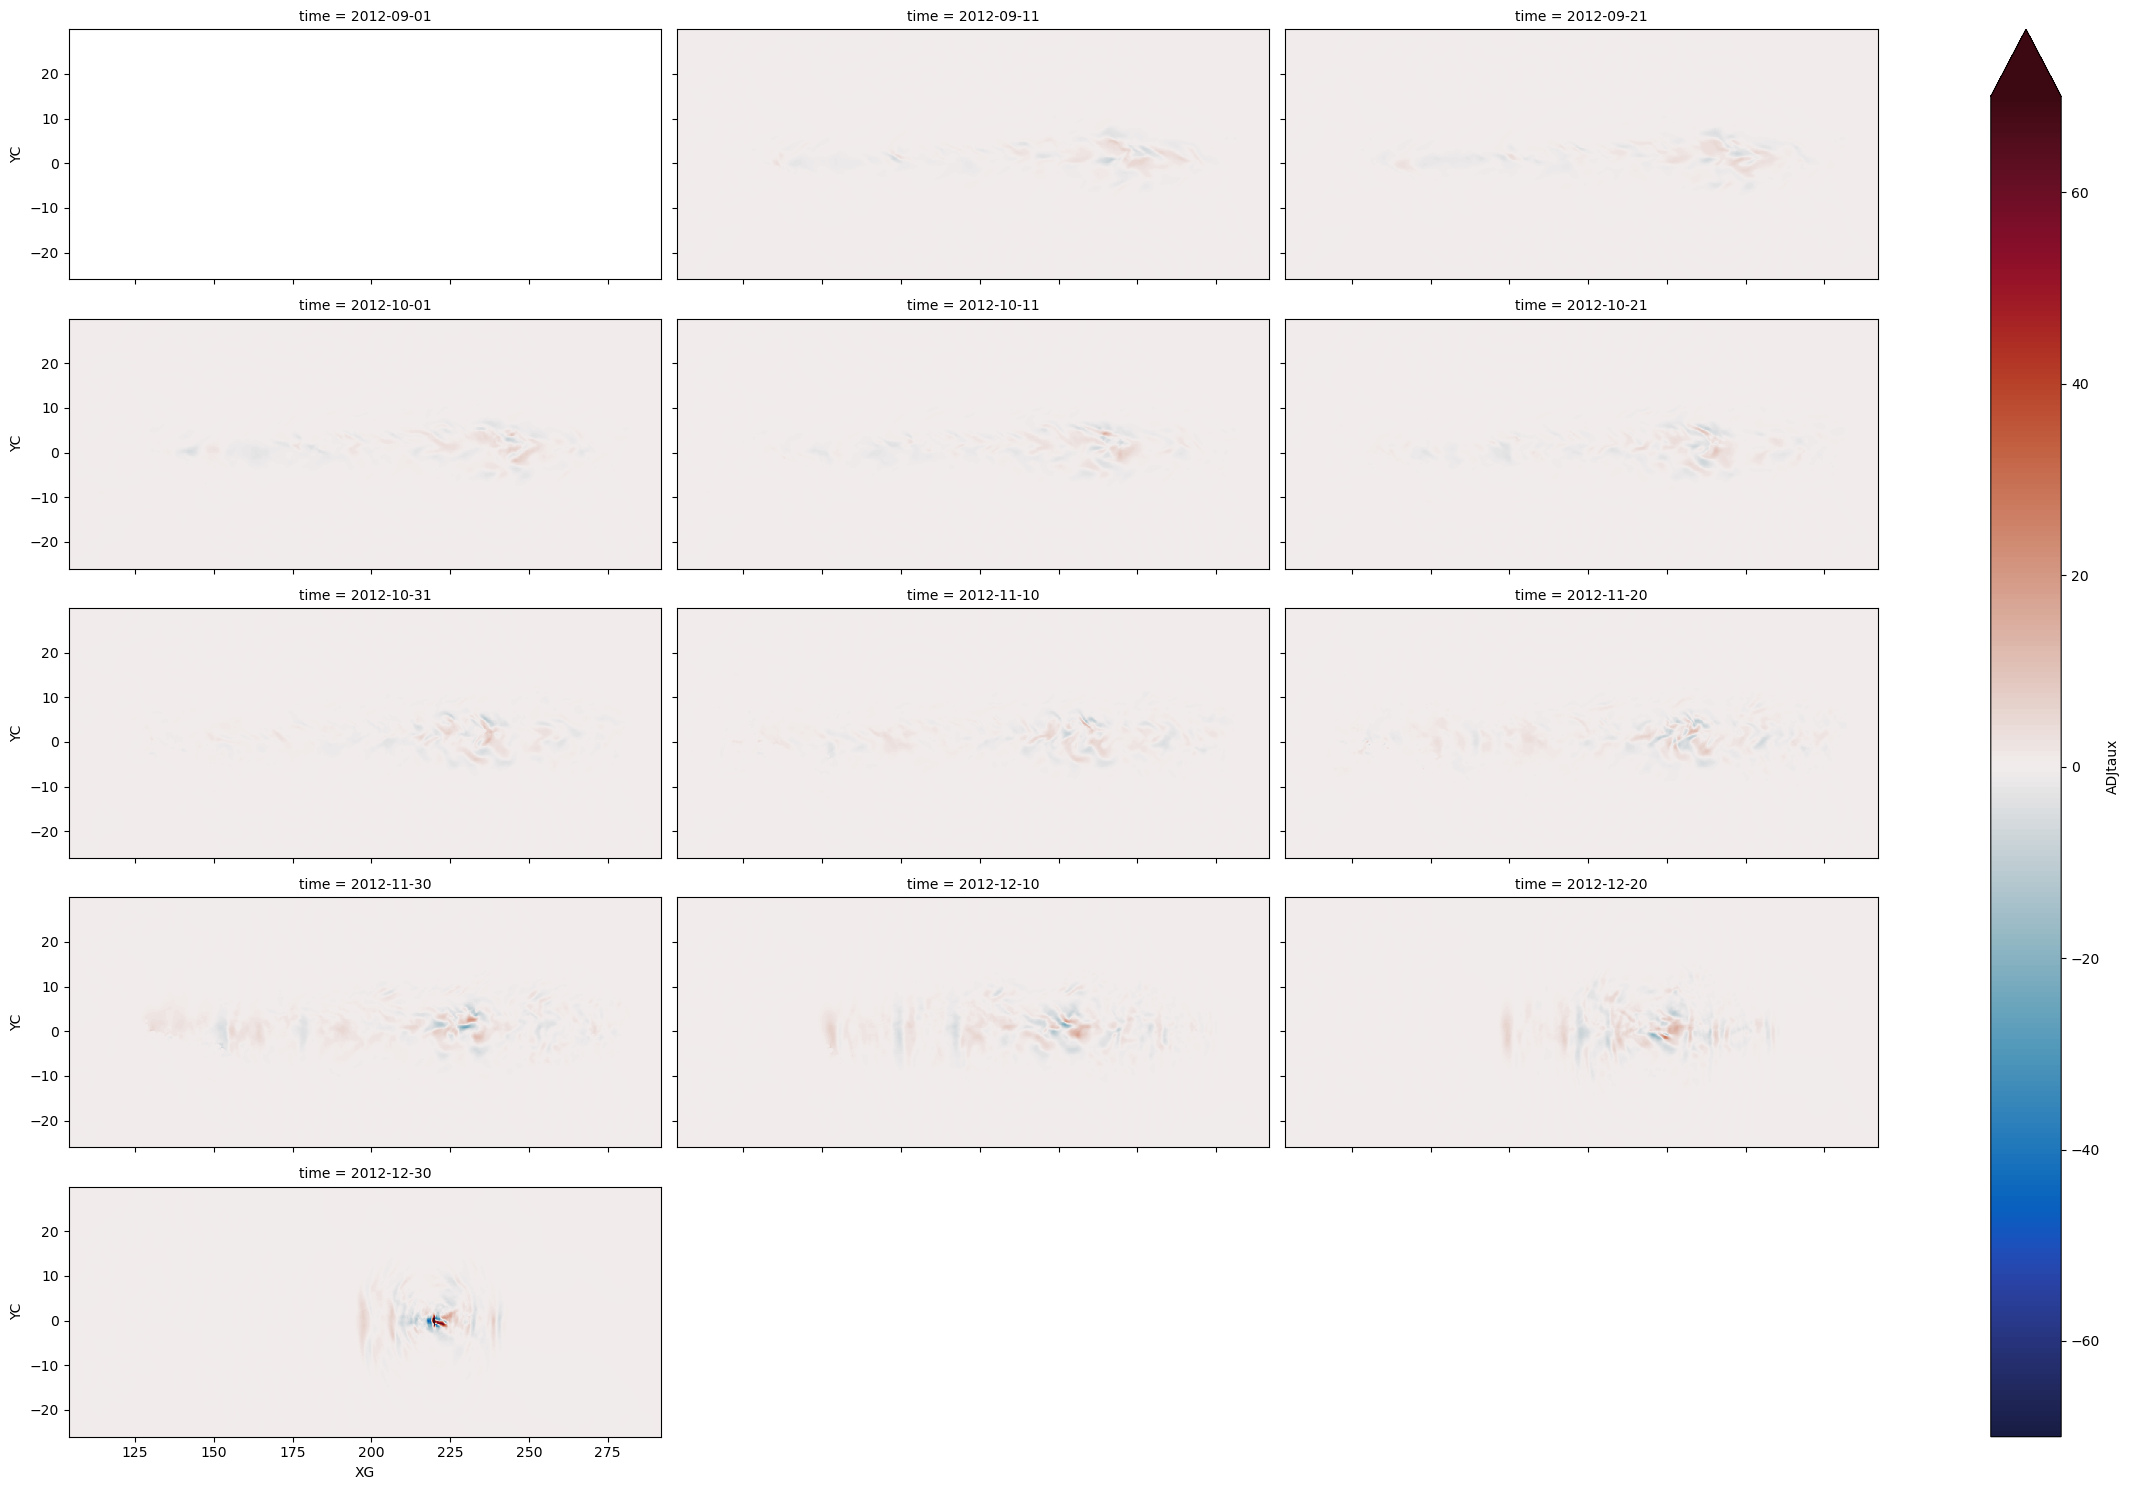

In [ ]:
(diff_ds.ADJtaux.rolling(time=10).mean())[::10].plot(x='XG', y='YC', col='time', col_wrap=3, aspect=2.5,vmin=-70,vmax=70,cmap=cmo.balance)

In [22]:
# client.shutdown()